# project 2-1

In [ ]:
import pickle
import pandas as pd
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras import activations

%matplotlib inline

In [ ]:
# for access to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# see what folders in path
!ls "/content/gdrive/MyDrive/Proj2_data"

data1  data2


In [ ]:
# Load pickled data
training_file = '/content/gdrive/MyDrive/Proj2_data/data1/train.pickle'
validation_file= '/content/gdrive/MyDrive/Proj2_data/data1/valid.pickle'
testing_file = '/content/gdrive/MyDrive/Proj2_data/data1/test.pickle'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
print(max(y_train), min(y_train))

42 0


In [ ]:
# Understand the loaded dataset
n_train = len(X_train)

n_validation = len(X_valid)

n_test = len(X_test)

image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


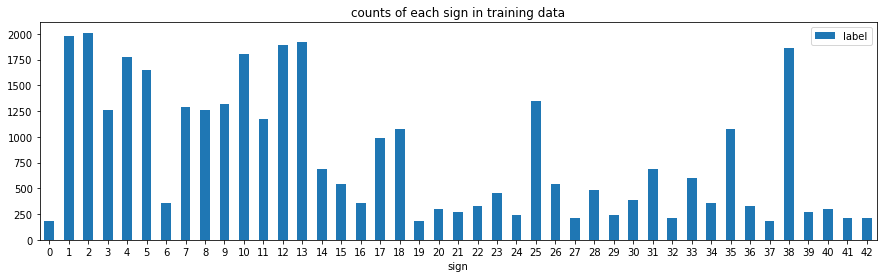

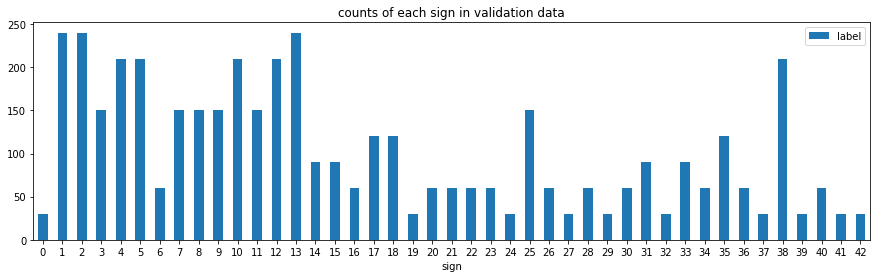

In [ ]:
# Plot Training / Validation summary counts and distribution
for (data, name) in [[y_train, "training"], [y_valid, "validation"]]:
    df = pd.DataFrame({'label': data})
    counts = df.groupby(['label']).agg({'label': 'count'})
    counts.plot(kind='bar', title="counts of each sign in %s data" % name, figsize=(15,4), rot=0)
    plt.xlabel("sign")
    plt.show()

شکل بالا نشان می دهد که اندازه ی کلاس های مختلف متوارن نیستند و همین مسئله باعث ایجاد بایاس به سمت یه کلاس خاص در نتایج می شود.

In [ ]:
# read lable_names dataset
signnames = pd.read_csv('/content/gdrive/MyDrive/Proj2_data/data1/label_names.csv')
signnames

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [ ]:
# produce a list of sign names
classID_signames = list(signnames['SignName'])
classID_signames

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing for vehicles over 3.5 metric tons',
 'Right-of-way at the next intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Vehicles over 3.5 metric tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End of all speed and passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End of no passing 

Speed limit (20km/h)


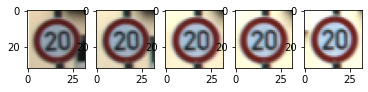

Speed limit (30km/h)


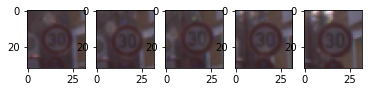

Speed limit (50km/h)


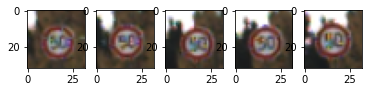

Speed limit (60km/h)


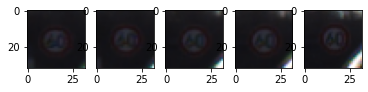

Speed limit (70km/h)


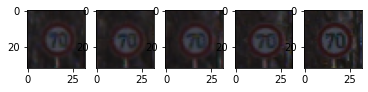

Speed limit (80km/h)


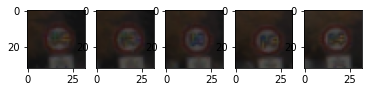

End of speed limit (80km/h)


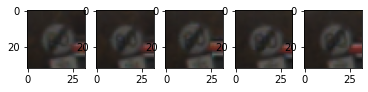

Speed limit (100km/h)


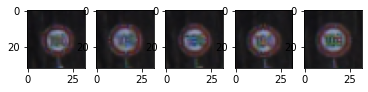

Speed limit (120km/h)


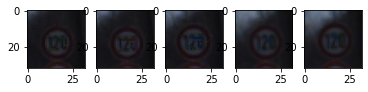

No passing


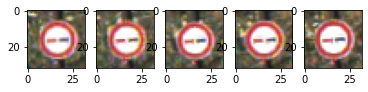

No passing for vehicles over 3.5 metric tons


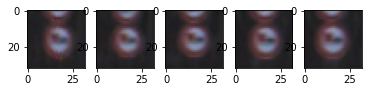

Right-of-way at the next intersection


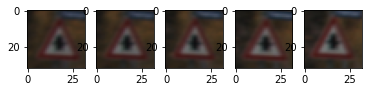

Priority road


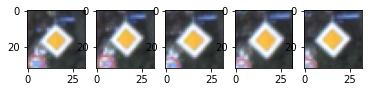

Yield


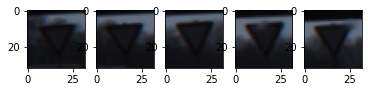

Stop


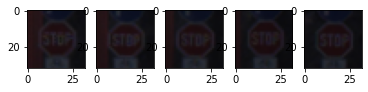

No vehicles


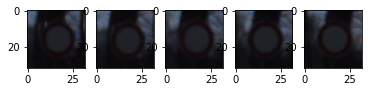

Vehicles over 3.5 metric tons prohibited


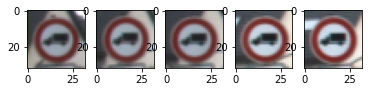

No entry


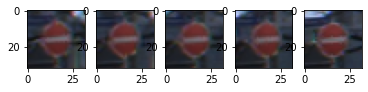

General caution


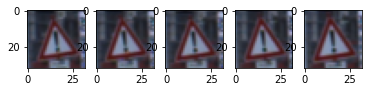

Dangerous curve to the left


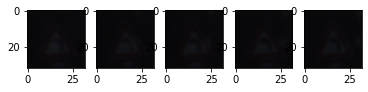

Dangerous curve to the right


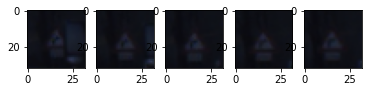

Double curve


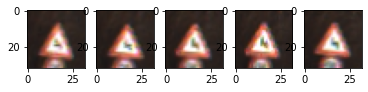

Bumpy road


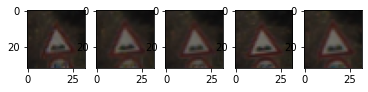

Slippery road


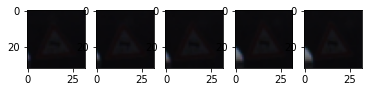

Road narrows on the right


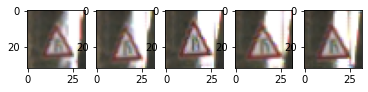

Road work


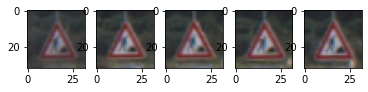

Traffic signals


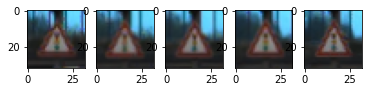

Pedestrians


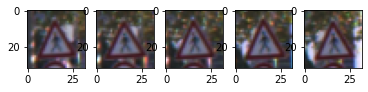

Children crossing


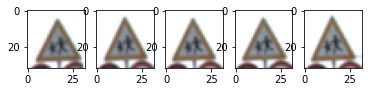

Bicycles crossing


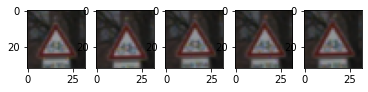

Beware of ice/snow


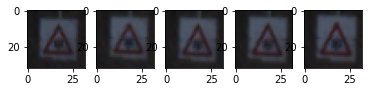

Wild animals crossing


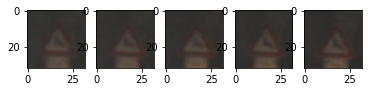

End of all speed and passing limits


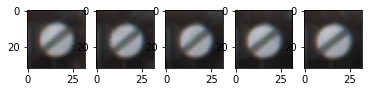

Turn right ahead


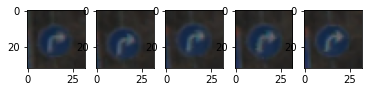

Turn left ahead


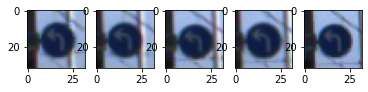

Ahead only


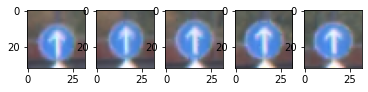

Go straight or right


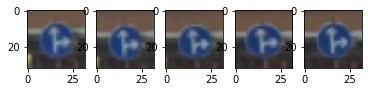

Go straight or left


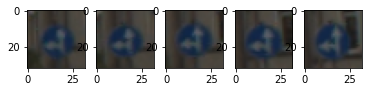

Keep right


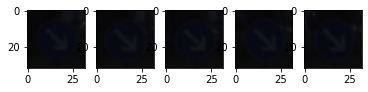

Keep left


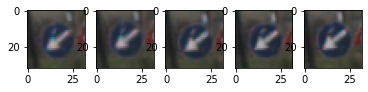

Roundabout mandatory


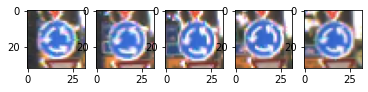

End of no passing


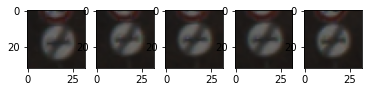

End of no passing by vehicles over 3.5 metric tons


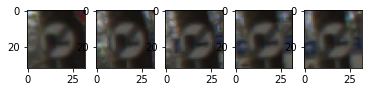

In [ ]:
# Gather 5 Example images per label
examples_per_sign = 5
total = 0
example = {}
for (img,label) in zip(X_train, y_train):
    example.setdefault(label, [])
    if len(example[label]) < examples_per_sign:
        example[label].append(img)
        total += 1
    if total == n_classes * examples_per_sign:
        break;

for label in sorted(example.keys()):
    fig = plt.figure()
    print(classID_signames[label])
    for i in range(examples_per_sign):
        plt.subplot(1,examples_per_sign,i+1)
        plt.imshow(example[label][i])
    plt.show()

# Data preprocessing

 طبق شکلهای نمونه ی بالا میبینیم که عکس ها شرایط نوری یکسانی ندارند و باید اصلاح شوند. اصلاح شدن عکس ها  فرآیند مقایسه عکس ها را بهبود می بخشد.

In [ ]:
# data preprocessing
# scale data to the range of [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_valid = X_valid.astype("float32") / 255.0

# one-hot encode the training and testing and validation labels
numLabels = len(np.unique(y_train))
y_train = to_categorical(y_train, numLabels)
y_test = to_categorical(y_test, numLabels)
y_valid = to_categorical(y_valid, numLabels)

# account for skew in the labeled data (برای عدم توازن کلاس ها)
# Account for skew in our dataset (i.e. the fact that we have significantly more images for some classes than others).
# assign a weight to each class for use during training.
classTotals = y_train.sum(axis=0)
classWeight = classTotals.max() / classTotals 


In [ ]:
print( "X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print(X_train)
print(y_train)
print(len(classWeight))
print(type(classWeight))

X_train :  (34799, 32, 32, 3)
y_train :  (34799, 43)
[[[[0.10980392 0.09803922 0.09411765]
   [0.10588235 0.09411765 0.09019608]
   [0.10588235 0.09411765 0.08627451]
   ...
   [0.1254902  0.10980392 0.09411765]
   [0.12156863 0.10588235 0.09803922]
   [0.12156863 0.10588235 0.10196079]]

  [[0.11372549 0.10196079 0.09803922]
   [0.10588235 0.09803922 0.09019608]
   [0.10588235 0.09803922 0.09019608]
   ...
   [0.1254902  0.10980392 0.09411765]
   [0.12156863 0.10588235 0.09411765]
   [0.11764706 0.10588235 0.09803922]]

  [[0.10980392 0.10196079 0.10196079]
   [0.10588235 0.09803922 0.09019608]
   [0.10196079 0.09803922 0.09019608]
   ...
   [0.1254902  0.10980392 0.09411765]
   [0.12156863 0.10588235 0.09411765]
   [0.11764706 0.10588235 0.09803922]]

  ...

  [[0.10588235 0.09411765 0.09019608]
   [0.10980392 0.09803922 0.09411765]
   [0.11764706 0.09803922 0.09411765]
   ...
   [0.10588235 0.09411765 0.09019608]
   [0.10980392 0.09411765 0.08627451]
   [0.11372549 0.09803922 0.0862

با استفاده از تابع زیر شرایط نوری عکس ها یکسان می شود یعنی مثلا اگر عکسی روشنایی خیلی زیادی دارد و چیزی از آن تصویر مشخص نیست با استفاده از این تابع که در دیتا جنریتور آورد می شود آن تصویر کشیده تر می شود و باعث می شود روشنایی آن  تنظیم شود و برای مقایسه کردن شرایطش بهتر شود 

اگر به جای استفاده از این تابع از تابع ایکوالایز هیست (بدون اداپتیو)
استقاده شود خیلی سرعت بهتری نسبت به این حالت خواهد داشت و زمان کمتری طول می کشد (مثل تابع هیستوگرامی که برای عکس های سیاه و سفید بکار بردیم در ادامه کد)

In [ ]:
from skimage import exposure
# produce function for adaptive histogram equalization 
def HE(img): 
    img_eq = exposure.equalize_hist(img)
    return img_eq

با استفاده از دستور زیر داده های بیشتری از خود داده های موحود ساخته می شود ، مثلا عکس موجود را زوم میکند، می چرخاند، و از ابعاد مختلف آن عکس تولید می کند تا مدل عکس های بیشتری ببیند و جنبه های مختلفی از یک عکس را دیده باشد همین امر موجب افزایش دقت و تعمیم پذیری مدل می شود

In [ ]:
datagen = ImageDataGenerator(
        preprocessing_function= HE, # set adaptive histogram equalization for processing image
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

با این قطعه کد پایین عکس های تولید شده توسط دیتا جنریتور و برچسب آن ها با هم ذخیره می شوند

In [ ]:
batch_size = 128
image_data = datagen.flow(X_train,y_train, batch_size = batch_size)

for i,(images,labels) in enumerate(image_data):
  print(i)
  if i == 0:
    print(images.shape)
    break

0
(128, 32, 32, 3)


/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


در کد زیر یکی از تصویرهایی که توسط دیتا جنریتور تولید شده را به همراه برچسب آن نمایش می دهیم 

/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


0
(1, 32, 32, 3)
(32, 32, 3)
(32, 32, 3)
label : [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


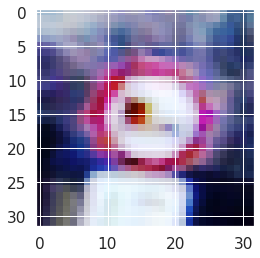

In [ ]:
batch_size = 1
image_data = datagen.flow(X_train,
                             y_train,
                            batch_size = batch_size)

for i,(images,labels) in enumerate(image_data):
  print(i)
  if i == 0:
    print(images.shape)
    img = images[0]
    print(img.shape)
    img = img.reshape(32,32,3)
    print(img.shape)
    plt.imshow(img)
    print('label : {}'.format(labels))
    break

In [ ]:
batch_size = 128
Training_data = datagen.flow(X_train, y_train, batch_size = batch_size)

Validation_data = datagen.flow(X_valid, y_valid, batch_size = batch_size)

Testing_data =  datagen.flow(X_test, y_test, batch_size = batch_size)


ذخیره کردن بهترین مدل تا لحظه ای که داره ایپاک ها اجرا میشه

In [ ]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", monitor = 'val_accuracy',verbose=1, save_best_only=True)


# model 1

In [ ]:
input_model = Input((X_train.shape[1],X_train.shape[2],X_train.shape[3]),name = 'input_layer')

model1 = Conv2D(32,(5,5), activation='relu',name = 'Conv1_5')(input_model)
model1 = BatchNormalization(name = 'Bnorm1')(model1)
model1 = Conv2D(32,(5,5), activation='relu', padding='same',name= 'Conv2_5')(model1)
model1 = BatchNormalization(name = 'Bnorm2')(model1)
model1 = MaxPooling2D((2, 2),name = 'MaxPool1')(model1)
model1 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv3_3')(model1)
model1 = BatchNormalization(name = 'Bnorm3')(model1)
model1 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv4_3')(model1)
model1 = BatchNormalization(name = 'Bnorm4')(model1)
model1 = AveragePooling2D((2, 2),name = 'AvgPool1')(model1)
model1 = Conv2D(128,(1,1), activation='relu' ,padding='valid',name = 'Conv5_1')(model1)
model1 = BatchNormalization(name = 'Bnorm5')(model1)
########################################################
model1 = Flatten(name = 'Flatten')(model1)
########################################################
model1 = Dense(units = 32, activation = 'relu')(model1)
model1 = Dropout(rate = 0.2)(model1)
model1 = BatchNormalization()(model1)
model1 = Dense(units = 20, activation = 'relu')(model1)
model1 = BatchNormalization()(model1)
model1 = Dense(units = 15, activation = 'relu')(model1)
model1 = BatchNormalization()(model1)
output = Dense(units = 43, activation = 'softmax' , name='preds')(model1)

model = Model(inputs= [input_model], outputs=[output])
model.summary()

Model: "functional_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv1_5 (Conv2D)             (None, 28, 28, 32)        2432      
_________________________________________________________________
Bnorm1 (BatchNormalization)  (None, 28, 28, 32)        128       
_________________________________________________________________
Conv2_5 (Conv2D)             (None, 28, 28, 32)        25632     
_________________________________________________________________
Bnorm2 (BatchNormalization)  (None, 28, 28, 32)        128       
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
Conv3_3 (Conv2D)             (None, 14, 14, 64)      

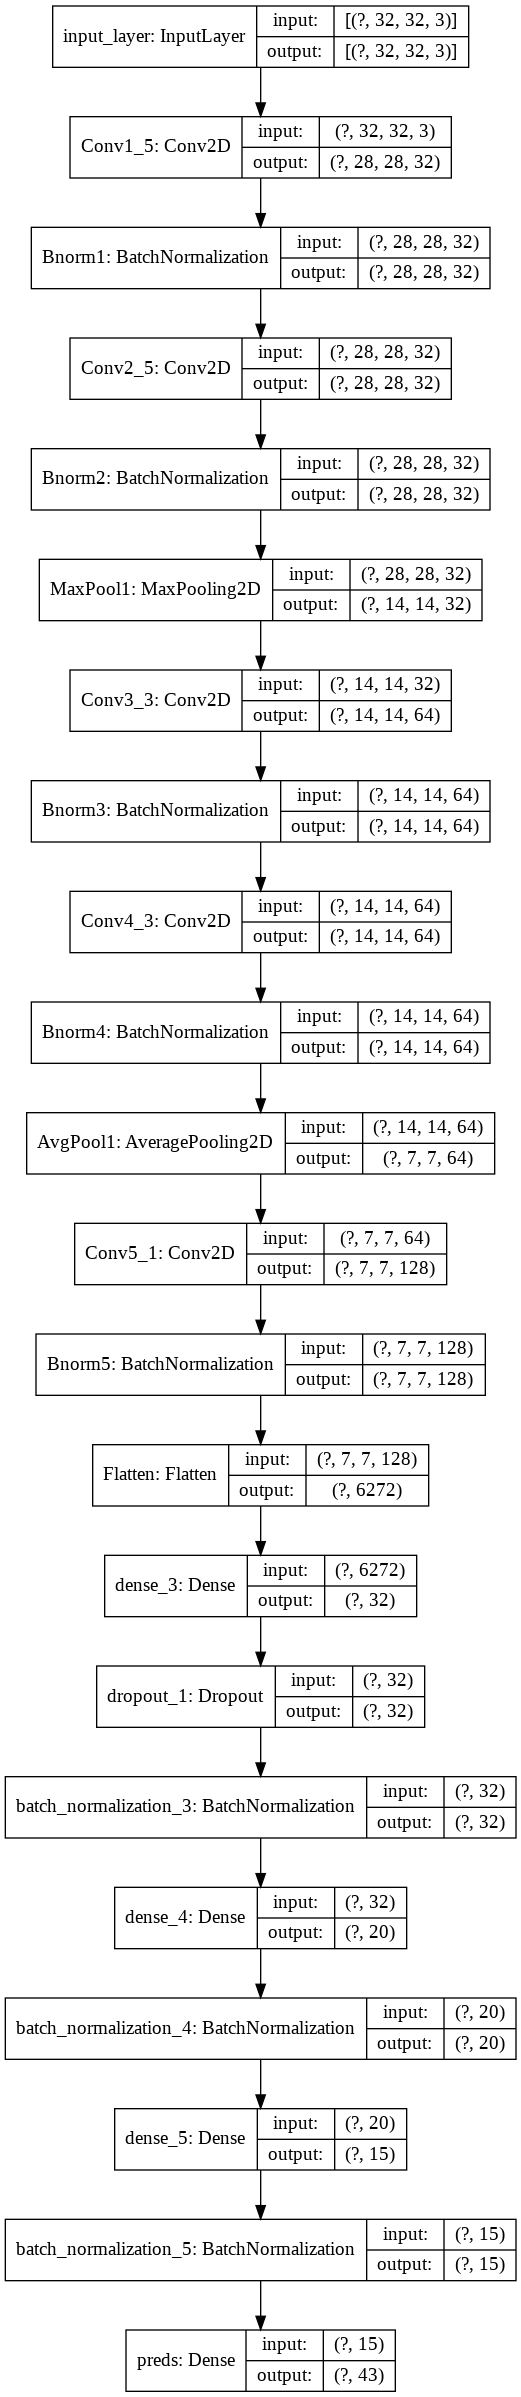

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

این مدل زیر را بدون در نظر گرفتن وزن برای کلاس ها ساختیم 

In [ ]:
history = model.fit_generator(Training_data, epochs= 5, validation_data= Validation_data, verbose=1, callbacks=[checkpointer])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5


/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


272/272 [==============================] - ETA: 0s - loss: 2.3864 - accuracy: 0.3587
Epoch 00001: val_accuracy improved from -inf to 0.44512, saving model to best_weights.hdf5
272/272 [==============================] - 36s 131ms/step - loss: 2.3864 - accuracy: 0.3587 - val_loss: 1.8180 - val_accuracy: 0.4451
Epoch 2/5
272/272 [==============================] - ETA: 0s - loss: 1.1665 - accuracy: 0.6465
Epoch 00002: val_accuracy improved from 0.44512 to 0.72472, saving model to best_weights.hdf5
272/272 [==============================] - 35s 129ms/step - loss: 1.1665 - accuracy: 0.6465 - val_loss: 0.8992 - val_accuracy: 0.7247
Epoch 3/5
272/272 [==============================] - ETA: 0s - loss: 0.6704 - accuracy: 0.8019
Epoch 00003: val_accuracy improved from 0.72472 to 0.81361, saving model to best_weights.hdf5
272/272 [==============================] - 35s 128ms/step - loss: 0.6704 - accuracy: 0.8019 - val_loss: 0.5961 - val_accuracy: 0.8136
Epoch 4/5
272/272 [=========================

In [ ]:
model.save_weights("model1_weights_hist.h5")
model.save("model1_hist.h5")

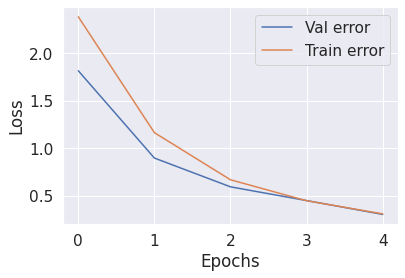

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error1.png')
plt.show()

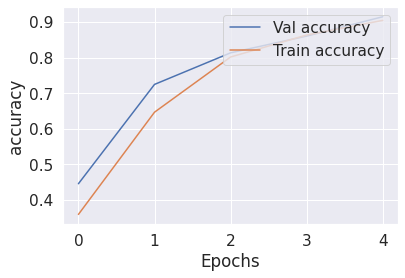

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy1.png')
plt.show()

# model 2

 ساختار این مدل دقیقا مشابه مدل قبل است با این تفاوت که در اینجا به هر کلاس یک وزن نسبت می دهیم تا جواب به سمت کلاس خاصی بایاس نداشته باشد

In [ ]:
classWeight = {i:classWeight[i] for i in range(classWeight.size)}
print(classWeight)

In [ ]:
history = model.fit_generator(Training_data, epochs= 5, validation_data= Validation_data, verbose=1, callbacks=[checkpointer], class_weight= classWeight)

/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


Epoch 1/5
272/272 [==============================] - ETA: 0s - loss: 1.8551 - accuracy: 0.7992
Epoch 00001: val_accuracy did not improve from 0.91519
272/272 [==============================] - 35s 128ms/step - loss: 1.8551 - accuracy: 0.7992 - val_loss: 0.4931 - val_accuracy: 0.8651
Epoch 2/5
272/272 [==============================] - ETA: 0s - loss: 0.8567 - accuracy: 0.8978
Epoch 00002: val_accuracy did not improve from 0.91519
272/272 [==============================] - 35s 128ms/step - loss: 0.8567 - accuracy: 0.8978 - val_loss: 0.3050 - val_accuracy: 0.9134
Epoch 3/5
272/272 [==============================] - ETA: 0s - loss: 0.4930 - accuracy: 0.9381
Epoch 00003: val_accuracy improved from 0.91519 to 0.94150, saving model to best_weights.hdf5
272/272 [==============================] - 35s 127ms/step - loss: 0.4930 - accuracy: 0.9381 - val_loss: 0.2568 - val_accuracy: 0.9415
Epoch 4/5
272/272 [==============================] - ETA: 0s - loss: 0.4043 - accuracy: 0.9488
Epoch 00004: v

اینجا بنظر میرسه دقت روی داده های ولیدیشن بهتر شده بخاطر اینکه به هر کلاس وزن نسبت دادیم برای جلوگیری از بایاس ب سمت یه کلاس خاص

In [ ]:
model.save_weights("model2_weights_hist.h5")
model.save("model2_hist.h5")

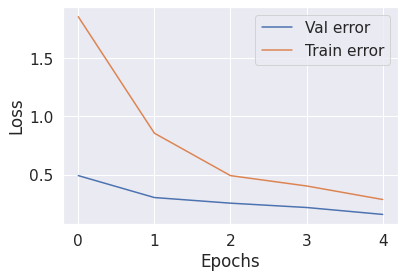

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error2.png')
plt.show()

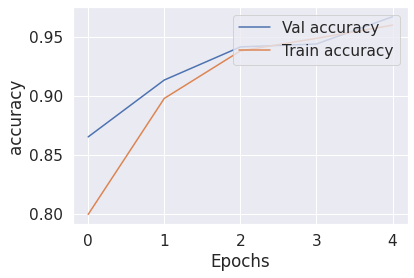

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy2.png')
plt.show()

# model 3

چون در مدل قبل به نتیجه خوبی رسیده بودیم پس مدل 2 تا حالا بهترین مدل است حال میخواهی ببینیم اگر در مدل 2 درا ابتدا قیلترهای چرخشی سایزش کوچکتر شود بهتر عمل می کند یا نه

In [ ]:
input_model = Input((X_train.shape[1],X_train.shape[2],X_train.shape[3]),name = 'input_layer')

model3 = Conv2D(32,(3,3), activation='relu',name = 'Conv1_5')(input_model)
model3 = BatchNormalization(name = 'Bnorm1')(model3)
model3 = Conv2D(32,(5,5), activation='relu', padding='same',name= 'Conv2_5')(model3)
model3 = BatchNormalization(name = 'Bnorm2')(model3)
model3 = MaxPooling2D((2, 2),name = 'MaxPool1')(model3)
model3 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv3_3')(model3)
model3 = BatchNormalization(name = 'Bnorm3')(model3)
model3 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv4_3')(model3)
model3 = BatchNormalization(name = 'Bnorm4')(model3)
model3 = AveragePooling2D((2, 2),name = 'AvgPool1')(model3)
model3 = Conv2D(128,(1,1), activation='relu' ,padding='valid',name = 'Conv5_1')(model3)
model3 = BatchNormalization(name = 'Bnorm5')(model3)
########################################################
model3 = Flatten(name = 'Flatten')(model3)
#######################################################
model3 = Dense(units = 32, activation = 'relu')(model3)
model3 = Dropout(rate = 0.2)(model3)
model3 = BatchNormalization()(model3)
model3 = Dense(units = 20, activation = 'relu')(model3)
model3 = BatchNormalization()(model3)
model3 = Dense(units = 15, activation = 'relu')(model3)
model3 = BatchNormalization()(model3)
output = Dense(units = 43, activation = 'softmax' , name='preds')(model3)

model = Model(inputs= [input_model], outputs=[output])
model.summary()

Model: "functional_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv1_5 (Conv2D)             (None, 30, 30, 32)        896       
_________________________________________________________________
Bnorm1 (BatchNormalization)  (None, 30, 30, 32)        128       
_________________________________________________________________
Conv2_5 (Conv2D)             (None, 30, 30, 32)        25632     
_________________________________________________________________
Bnorm2 (BatchNormalization)  (None, 30, 30, 32)        128       
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 15, 15, 32)        0         
_________________________________________________________________
Conv3_3 (Conv2D)             (None, 15, 15, 64)      

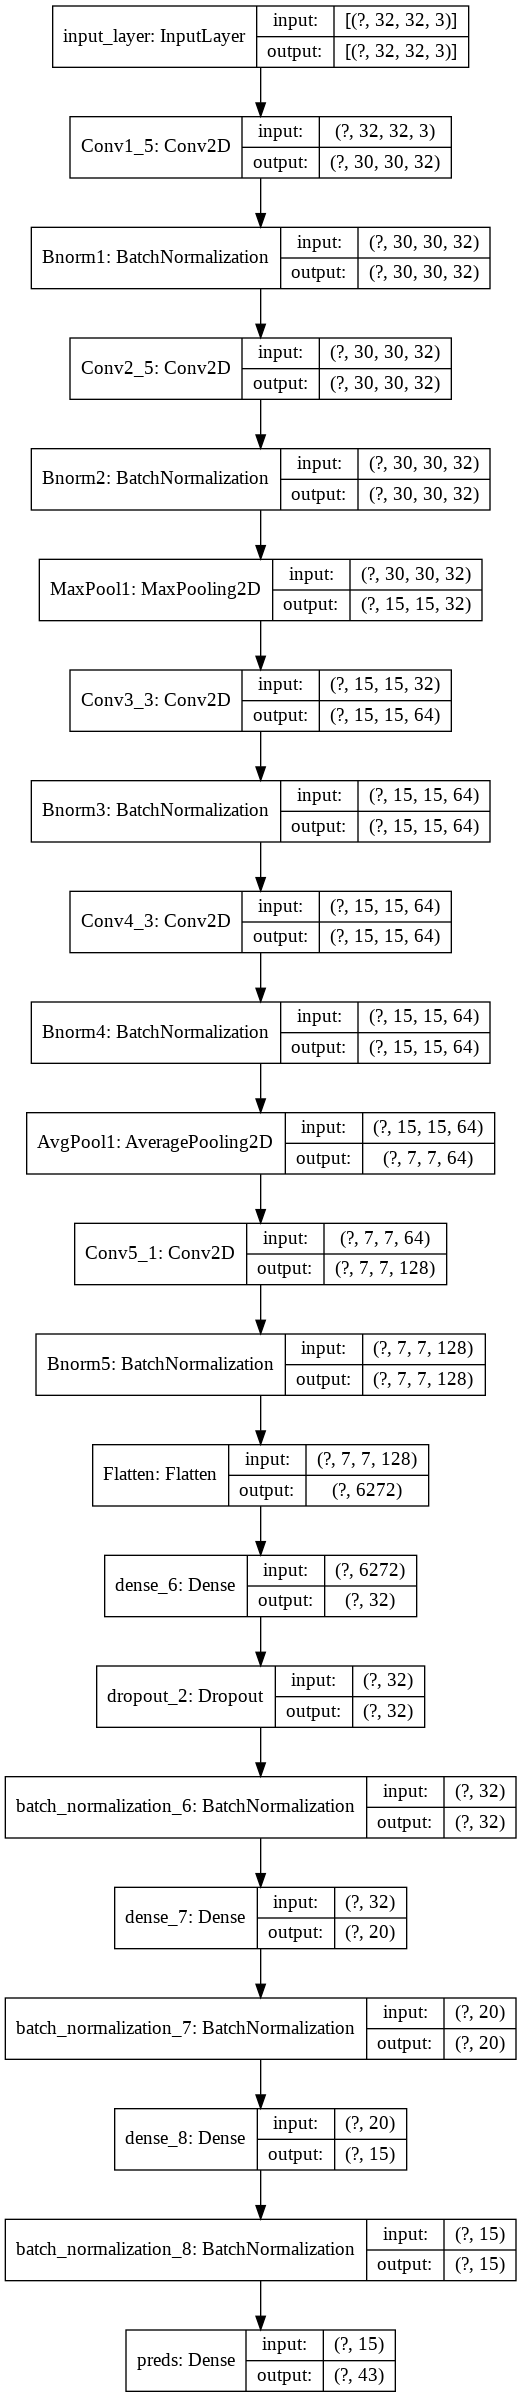

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
classWeight = {i:classWeight[i] for i in range(0,classWeight.size)}


In [ ]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(Training_data, epochs= 5, validation_data= Validation_data, verbose=1, callbacks=[checkpointer], class_weight= classWeight)

/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


Epoch 1/5
272/272 [==============================] - ETA: 0s - loss: 6.4104 - accuracy: 0.2024
Epoch 00001: val_accuracy did not improve from 0.96712
272/272 [==============================] - 36s 131ms/step - loss: 6.4104 - accuracy: 0.2024 - val_loss: 2.3371 - val_accuracy: 0.2714
Epoch 2/5
272/272 [==============================] - ETA: 0s - loss: 3.6527 - accuracy: 0.4732
Epoch 00002: val_accuracy did not improve from 0.96712
272/272 [==============================] - 36s 132ms/step - loss: 3.6527 - accuracy: 0.4732 - val_loss: 1.2350 - val_accuracy: 0.5599
Epoch 3/5
272/272 [==============================] - ETA: 0s - loss: 2.2936 - accuracy: 0.6462
Epoch 00003: val_accuracy did not improve from 0.96712
272/272 [==============================] - 35s 130ms/step - loss: 2.2936 - accuracy: 0.6462 - val_loss: 1.0299 - val_accuracy: 0.6347
Epoch 4/5
272/272 [==============================] - ETA: 0s - loss: 1.3747 - accuracy: 0.7852
Epoch 00004: val_accuracy did not improve from 0.9671

بنظر میرسد مدل2 بهترین مدل باشد زیرا دقت روی داده های ولیدیشن برای آن از این مدل بهتر  است و تابع لاس روی داده های آموزشی مدل 2 نیز کمتر از مدل 3 است.

In [ ]:
model.save_weights("model3_weights_hist.h5")
model.save("model3_hist.h5")

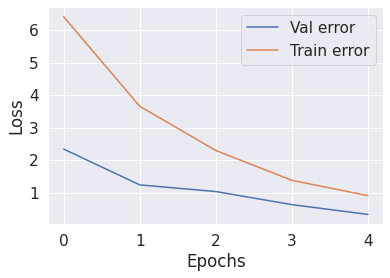

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error3.png')
plt.show()

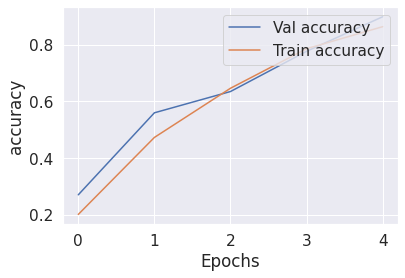

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy3.png')
plt.show()

# loading model on a testset

در اینجا مدل 2 رو لود می کنیم و داده های تست را روی ان لود می کنیم

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/proj2_1/model2_hist.h5')

In [ ]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

99/99 [==============================] - 1s 6ms/step - loss: 1.2275 - accuracy: 0.8011
Test score: 1.227451205253601
Test accuracy: 0.8011084794998169


In [ ]:
print(X_test.shape)

(12630, 32, 32, 3)


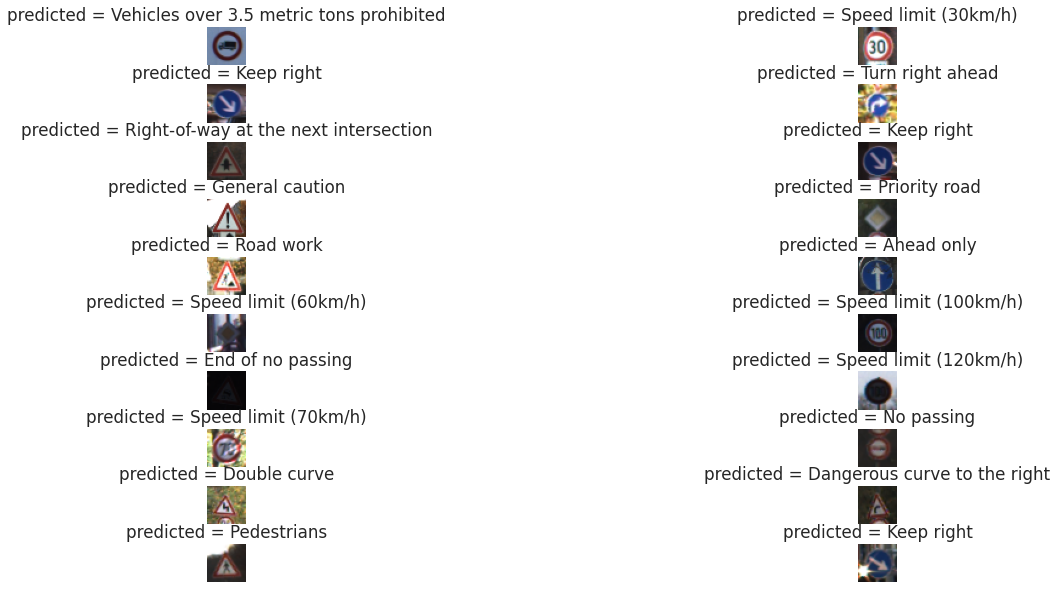

In [ ]:
num = 20
test_list = []
for i in range(num):
  test_list.append(X_test[i])
test_list = np.array(test_list)  

# این دو خط بعدی نتیجه پیش بینی شده روی دادههای تست را نشان می دهدو چون تابع فعالیت آرگ مکس است عنصری که بیشترین احتمال را دارد به عنوان برچسب برای عکس استفاده می شود
predict_test = model.predict(test_list)
predict_test_id = predict_test.argmax(axis=1) 

f = plt.figure(figsize=(20, 16))
for i in range(num):
    plt.subplot(num, 2, i+1)
    plt.imshow(test_list[i])
    plt.title(f'predicted = {classID_signames[predict_test_id[i]]}')
    plt.axis('off')
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)

##confution matrix

مدل را بر روی داده های تست اجرا می کنیم و چون تابع فعالیت ما احتمالاتی است برچسب دادهی تست مربوط به تابلویی است که بیشترین احتمال را داشته باشد ما اینکار را با استفاده از تابع آرگ مکس انجام می دهیم

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)
pred_id = np.argmax(y_pred, axis=1)
print(pred_id)

[[4.3949853e-09 4.5761168e-12 8.3780812e-13 ... 1.1148343e-05
  9.7663451e-07 2.9972052e-09]
 [1.4434017e-04 9.7954249e-01 6.0066911e-03 ... 2.6491296e-07
  2.5495649e-06 1.4014727e-04]
 [2.2327109e-11 5.3584529e-07 3.3842448e-06 ... 3.8290178e-05
  7.4394184e-09 5.0417577e-05]
 ...
 [1.1930272e-03 4.9116422e-04 1.3001289e-05 ... 2.5053327e-05
  2.7742999e-04 1.5176791e-03]
 [9.0786652e-04 1.4309911e-04 5.1567017e-06 ... 1.4417291e-04
  1.0099307e-03 2.7257837e-03]
 [5.1530243e-08 1.1964344e-09 4.1723917e-05 ... 5.8145638e-06
  1.3499050e-07 1.6135823e-06]]
[16  1 38 ...  3  3 10]


بر روی خروجی داده های تست که از قبل نیز داشتیم این آرگ مکس را انجام میدهیم تا بفهمیم خروجی مربوط به چه تابلویی است

In [ ]:
y_test_id = np.argmax(y_test, axis=1)
print(y_test_id)

[16  1 38 ...  6  7 10]


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
import seaborn as sns

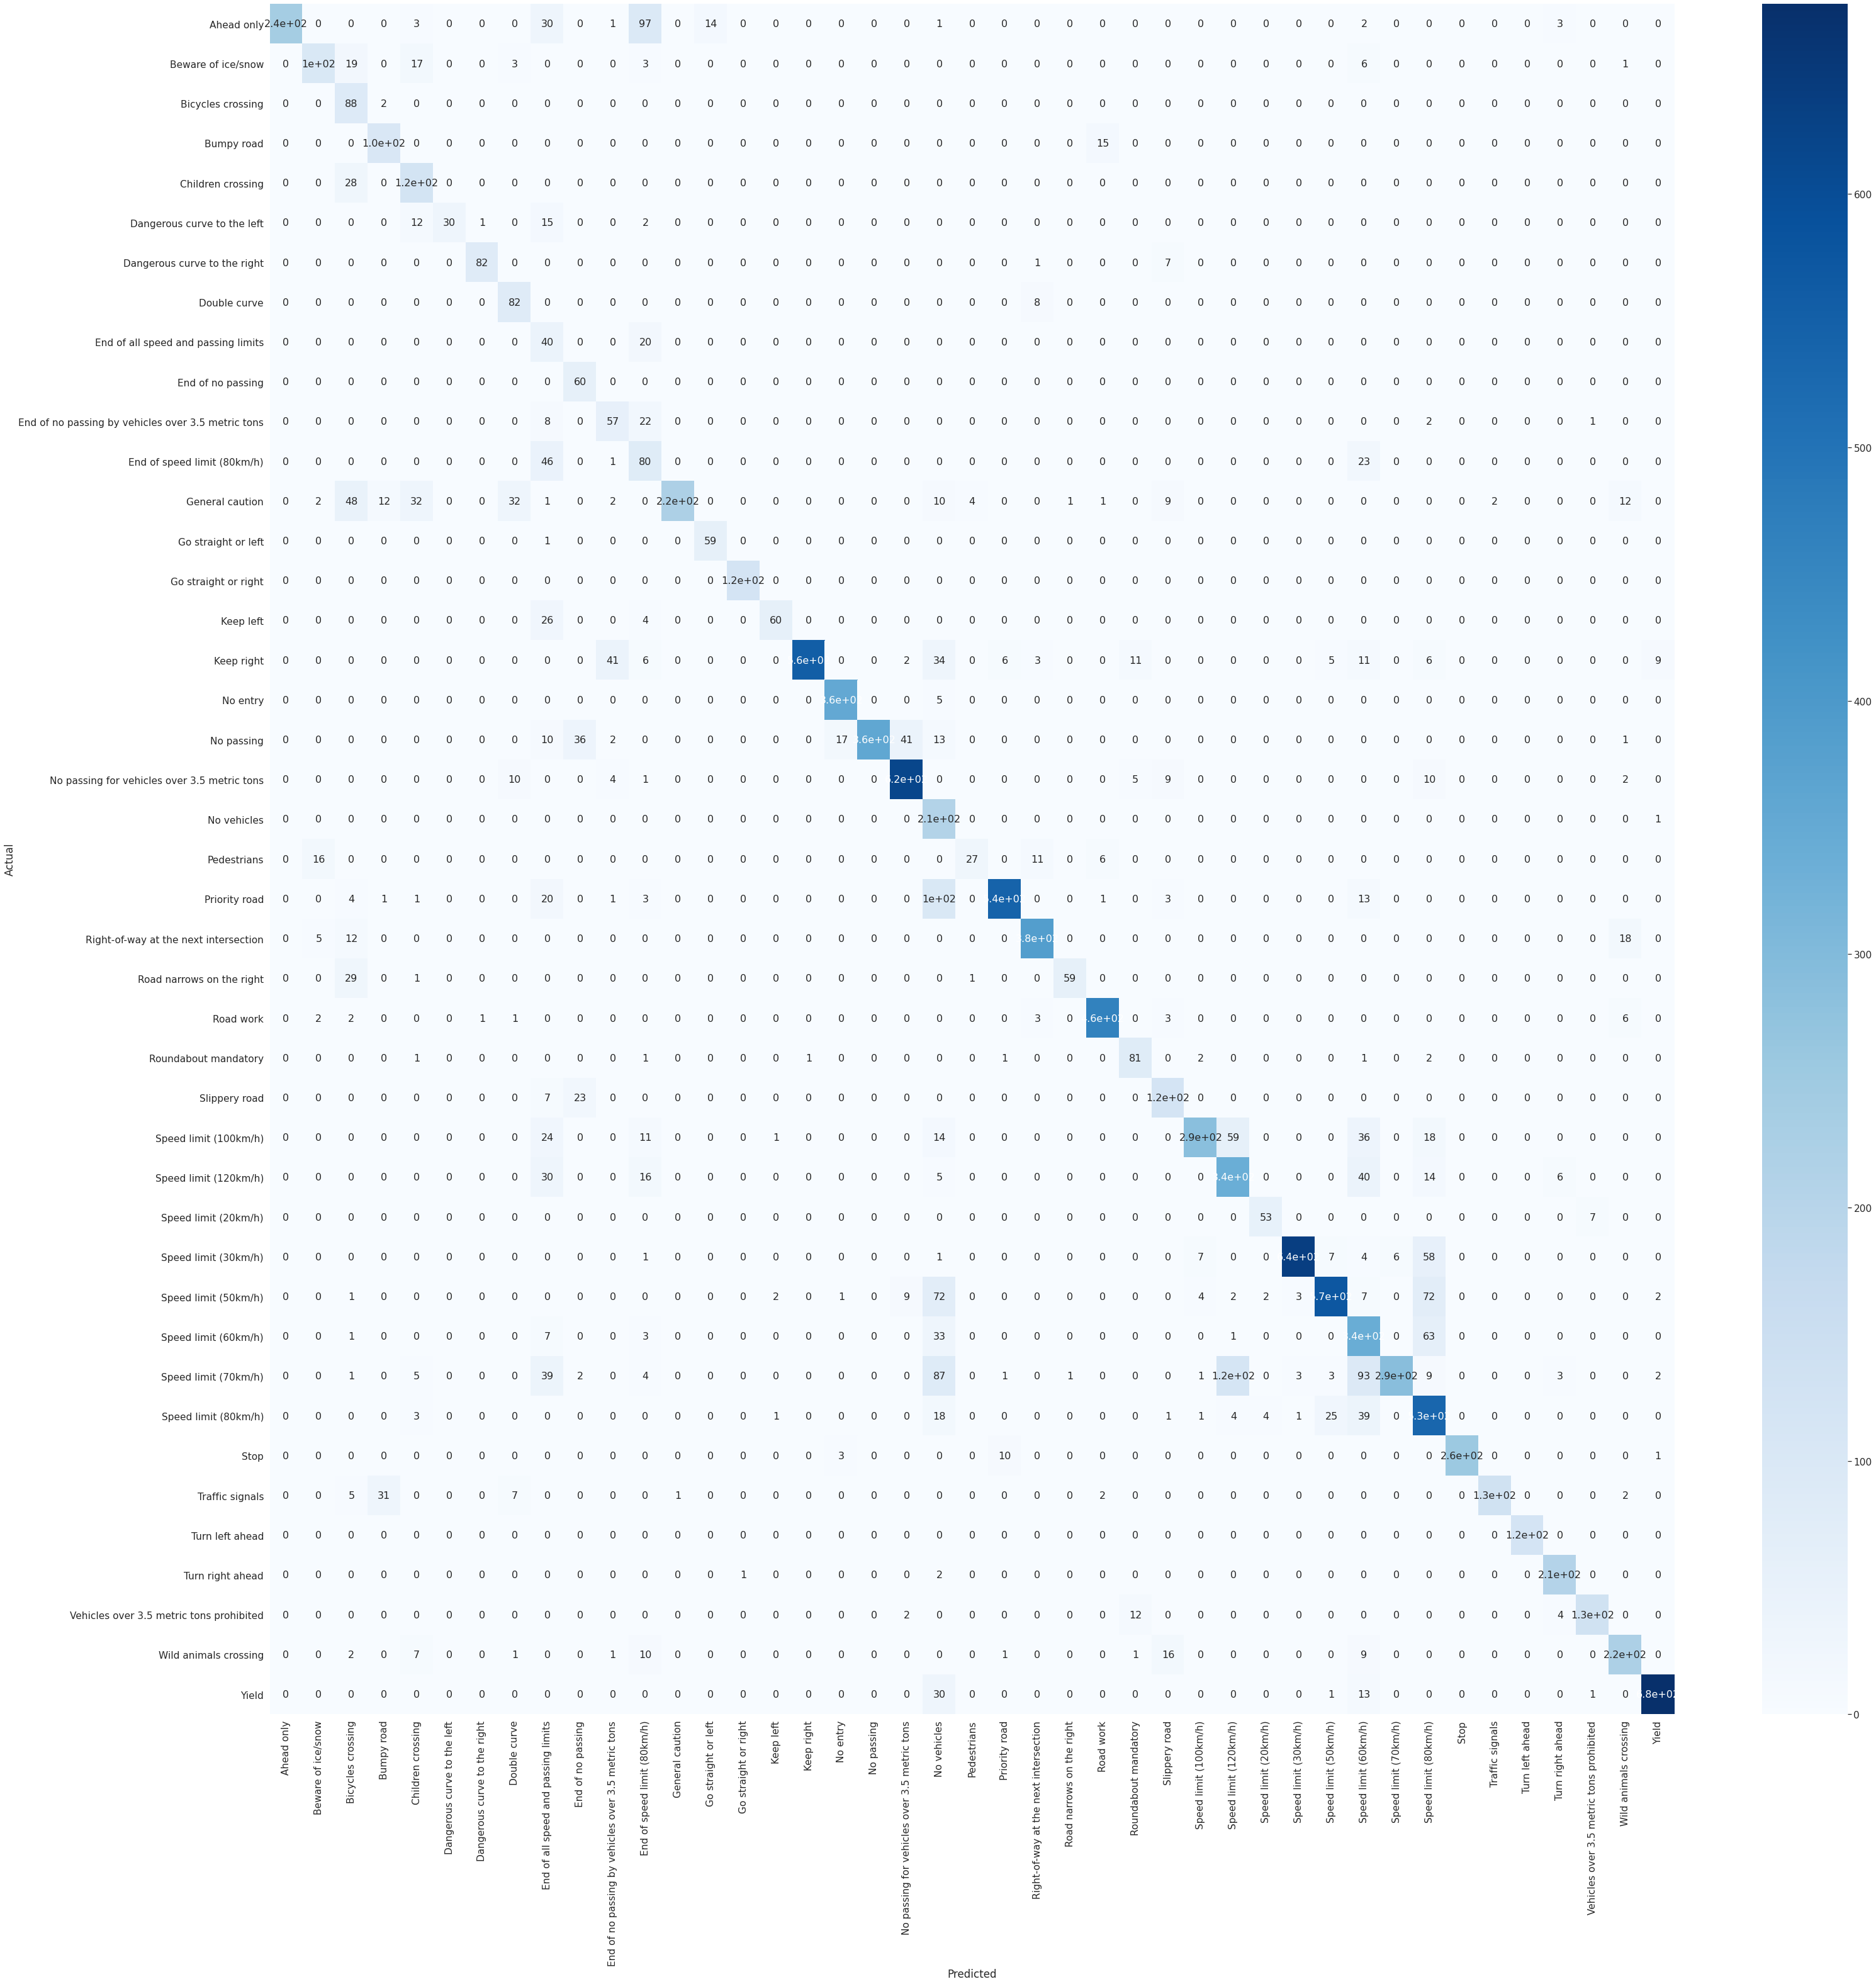

In [ ]:
y_true = [classID_signames[i] for i in y_test_id]
y_pred = [classID_signames[i] for i in pred_id]
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (50,50))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

در شکل بالا محور سمت چپ برچسب های واقعی دادهای تست است و محور پایین برچسب های پیش بینی شده است.
برای مثال وقتی بررسی میکنیم تعداد زیادی از تابلوهای محدودیت سرعت 70 را با تابلوی محدودیت سرعت 120 اشتباه گرفته و یا تعداد زیادی از تابلوهای حق تقدم را با تابلوی بدون وسیله اشتباه گرفته.

## Grad Cam

حالا برای اینکه ببینیم دلیل اینکه این تشخیص ها داده می شود چیست از الگوریتمی به نام گراد کم استفاده می کنیم تا ببنیم فوکس عکس بیشتر روی چه چیزی است که باعث می شود این اشتباهات رخ دهد.

In [ ]:
layer_names = []
for layer in model.layers[1:13]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

layer_names

['Conv1_5',
 'Bnorm1',
 'Conv2_5',
 'Bnorm2',
 'MaxPool1',
 'Conv3_3',
 'Bnorm3',
 'Conv4_3',
 'Bnorm4',
 'AvgPool1',
 'Conv5_1',
 'Bnorm5']

In [ ]:
last_conv_layer_name = "Bnorm5"

classifier_layer_names = []
for layer in model.layers[13:]:
    classifier_layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

classifier_layer_names

['Flatten',
 'dense_3',
 'dropout_1',
 'batch_normalization_3',
 'dense_4',
 'batch_normalization_4',
 'dense_5',
 'batch_normalization_5',
 'preds']

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

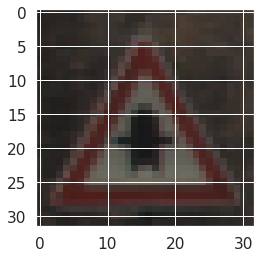

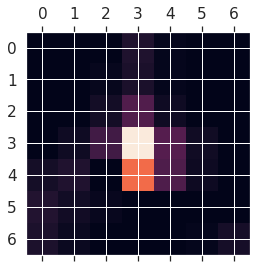

In [ ]:
# Print what the top predicted class is
imagee = X_test[4]
preds = model.predict(X_test[4].reshape(1, 32, 32,3))
preds = np.argmax(preds, axis = 1)
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(X_test[4].reshape(1, 32, 32, 3), model, last_conv_layer_name, classifier_layer_names)
# Display heatmap
plt.imshow(imagee.reshape(32,32,3))
plt.matshow(heatmap)
plt.show()

برای مثال در شکل بالا (در قطعه کد بالاتر چند عکس را به طور مثال انتخاب کردم از داده های تست و انتخاب این عکس از آنجا است) نشان میدهد فوکوس عکس بیشتر در وسط آن است

(32, 32, 1)


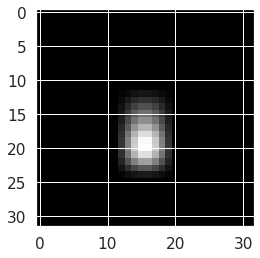

In [ ]:
# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :1]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((imagee.shape[1], imagee.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
print(jet_heatmap.shape)
superimposed_img = jet_heatmap * 0.4 + imagee
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

plt.imshow(superimposed_img)
plt.show()

در شکل بالا قسمتی از عکس را که روی آن تمرکز شده را نشان می دهد.

Priority road


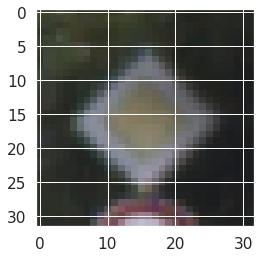

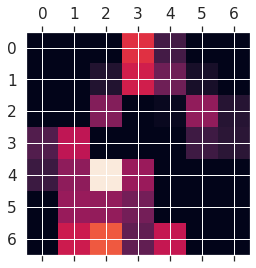

(32, 32, 1)


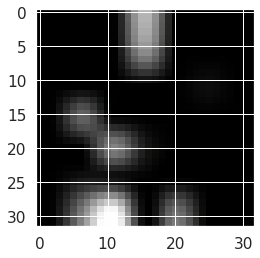

No vehicles


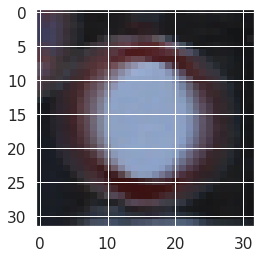

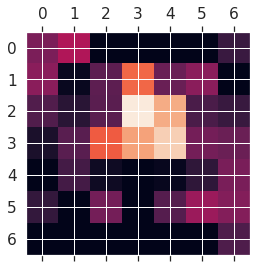

(32, 32, 1)


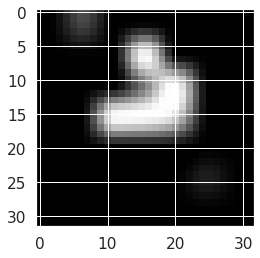

In [ ]:
total = 0
img_list = []
example = {}
for (img,label) in zip(X_test, np.argmax(y_test, axis =1)):
    if label == 12 or label == 15 :
      example.setdefault(label, [])
      if len(example[label]) < 1:
        example[label].append(img)
        img_list.append(img)
        total += 1
    if total == 5:
        break;

for label in sorted(example.keys()):
  img = example[label][0]
  preds = model.predict(img.reshape(1, 32, 32,3))
  preds = np.argmax(preds, axis = 1)
  # Generate class activation heatmap
  heatmap = make_gradcam_heatmap(img.reshape(1, 32, 32, 3), model, last_conv_layer_name, classifier_layer_names)
  # Display heatmap
  plt.imshow(img.reshape(32,32,3))
  print(classID_signames[label])
  plt.matshow(heatmap)
  plt.show()

  # We rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)

  # We use jet colormap to colorize heatmap
  jet = cm.get_cmap("jet")

  # We use RGB values of the colormap
  jet_colors = jet(np.arange(256))[:, :1]
  jet_heatmap = jet_colors[heatmap]

  # We create an image with RGB colorized heatmap
  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

  # Superimpose the heatmap on original image
  print(jet_heatmap.shape)
  superimposed_img = jet_heatmap * 0.4 + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

  plt.imshow(superimposed_img)
  plt.show()
  

در قطعه کد بالا تعدادی از تصاویری که با هم اشتباه گرفته می شوند را به همراه نقاطی که مدل روی ان متمرکز است را رسم کردیم.
می بینیم که تمرکز این مدل روی تابلوهای حق تقدم در گوشه ها است که سفید است و برای تابلوی بدون وسیله نقلیه در وسط است که آن هم سفید است و همین باعث می شود تعدادی از تابلوهای حق تقدم با بدون وسیله نقلیه اشتباه گرفته شوند..

# Visualizing output of CNN layers

در این قسمت هدف این است که خروجی لایه های مختلف شبکه پیچشی یا به عبارتی دیگر 
فیچر مپ ها را روی یک تصویر دلخواه نمایش دهیم.

برای مثال ما این کار را روی 100 امین عکس آموزشی انجام میدهیم که مربوط به تابلوی 
سرعت 30 است.

<function matplotlib.pyplot.show>

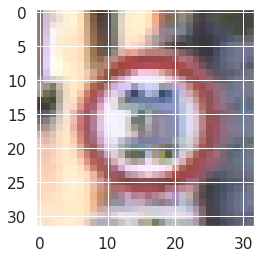

In [ ]:
plt.imshow(X_test[100])
plt.show

layer : Conv1_5 , feature map shape : (1, 28, 28, 32)
nrow : 4 , ncol : 8


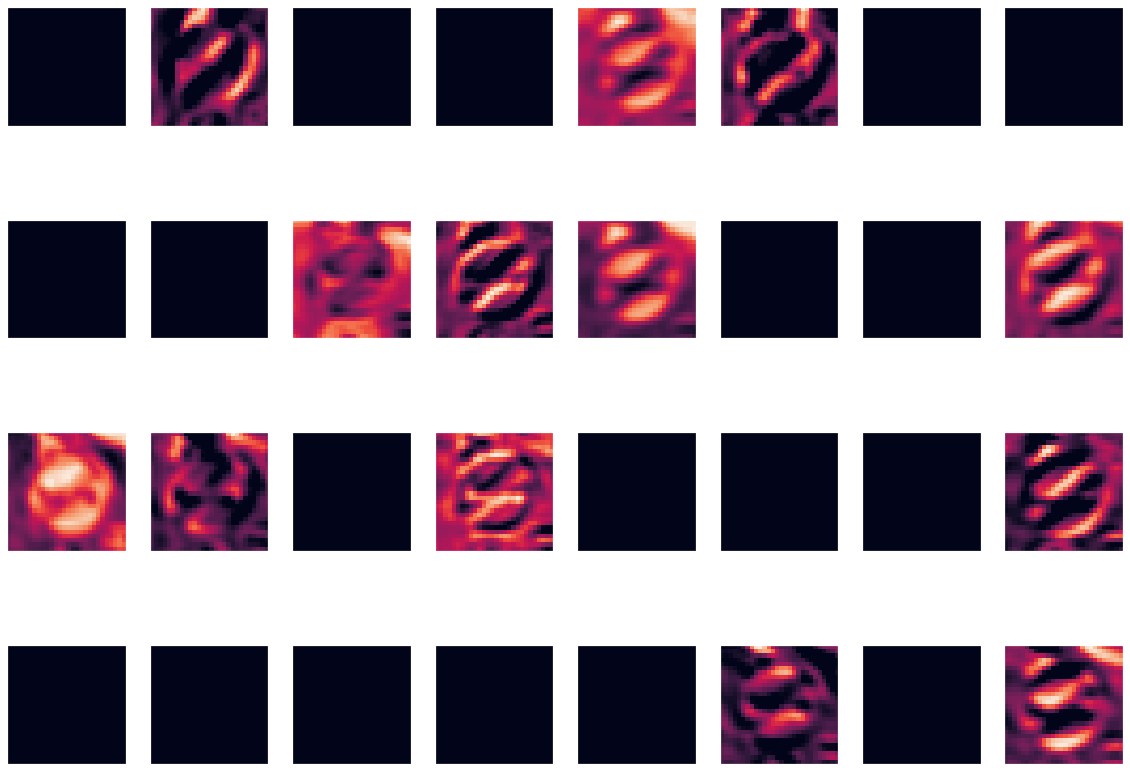

layer : Bnorm1 , feature map shape : (1, 28, 28, 32)
nrow : 4 , ncol : 8


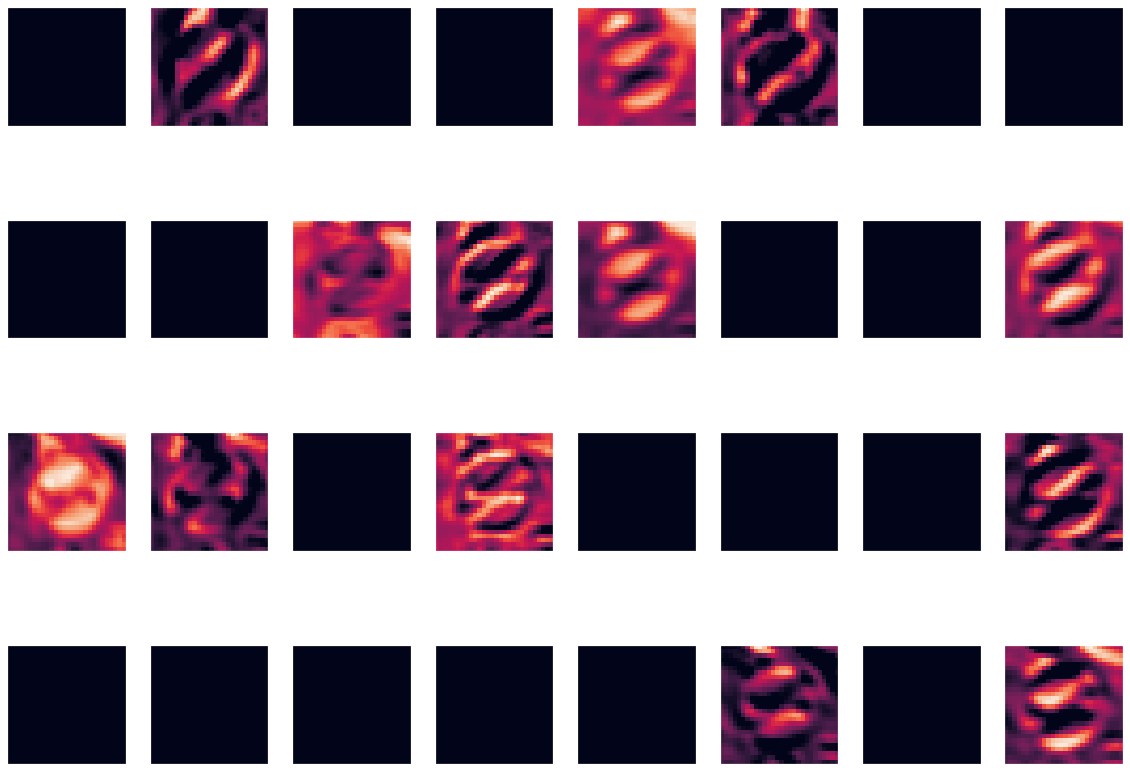

layer : Conv2_5 , feature map shape : (1, 28, 28, 32)
nrow : 4 , ncol : 8


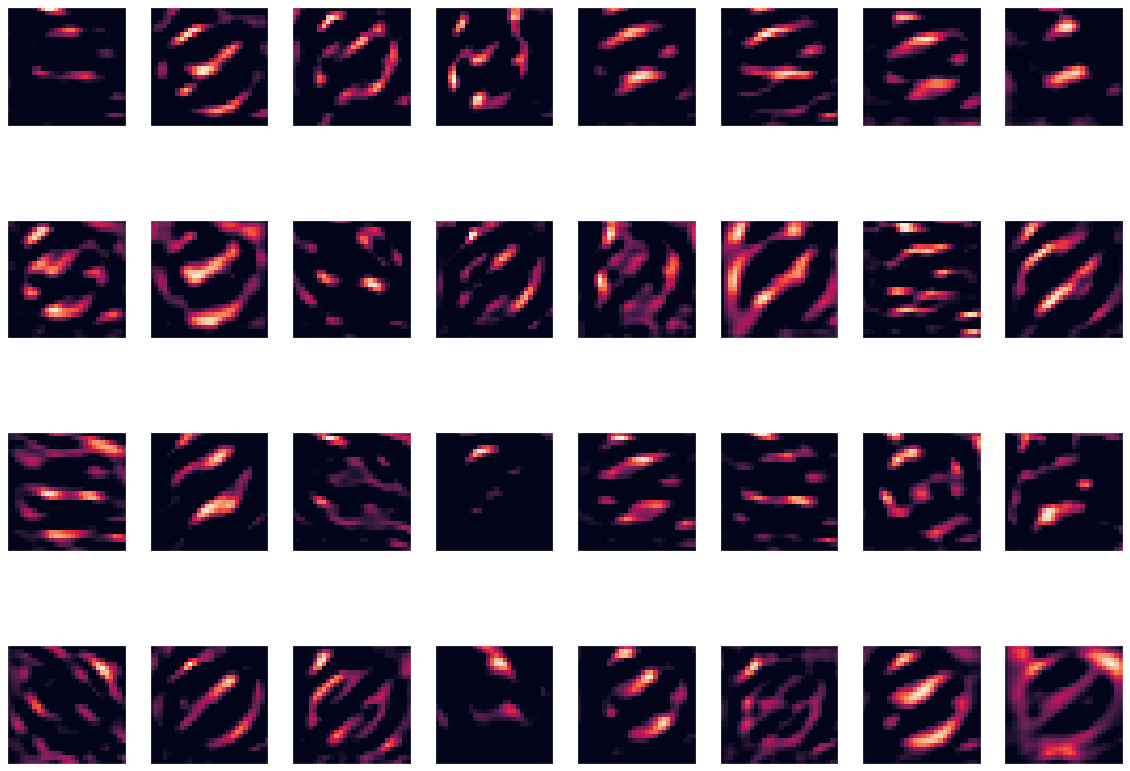

layer : Bnorm2 , feature map shape : (1, 28, 28, 32)
nrow : 4 , ncol : 8


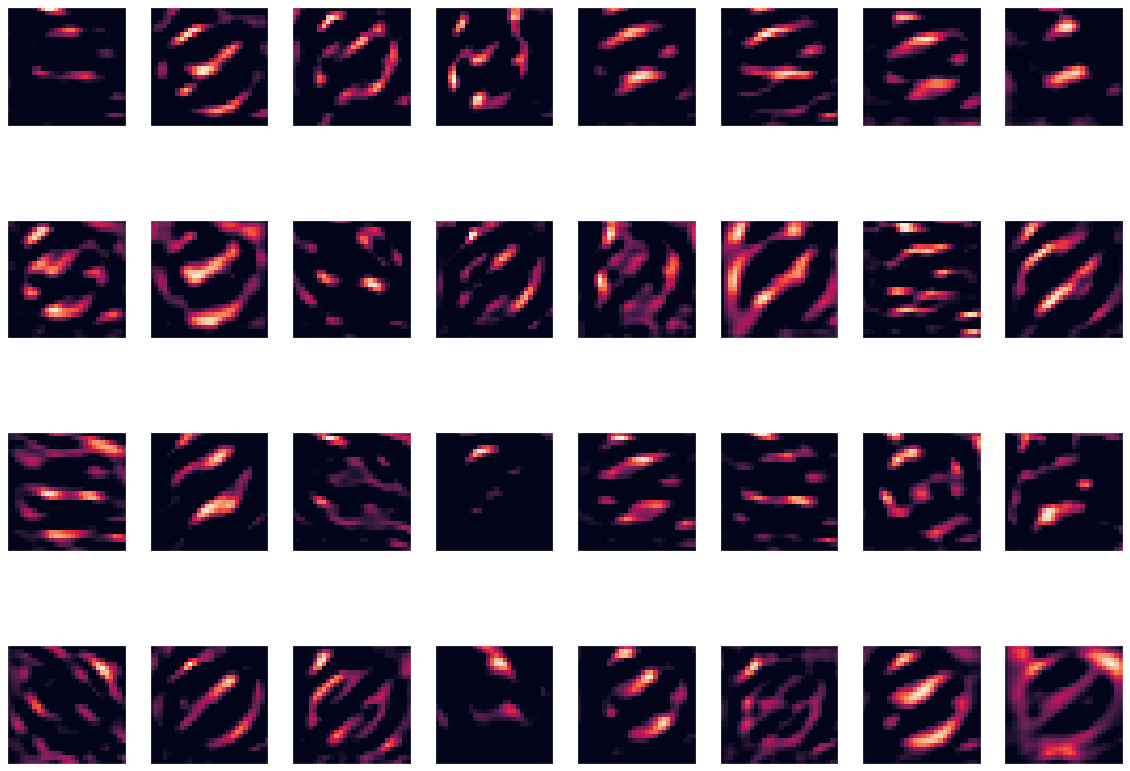

layer : MaxPool1 , feature map shape : (1, 14, 14, 32)
nrow : 4 , ncol : 8


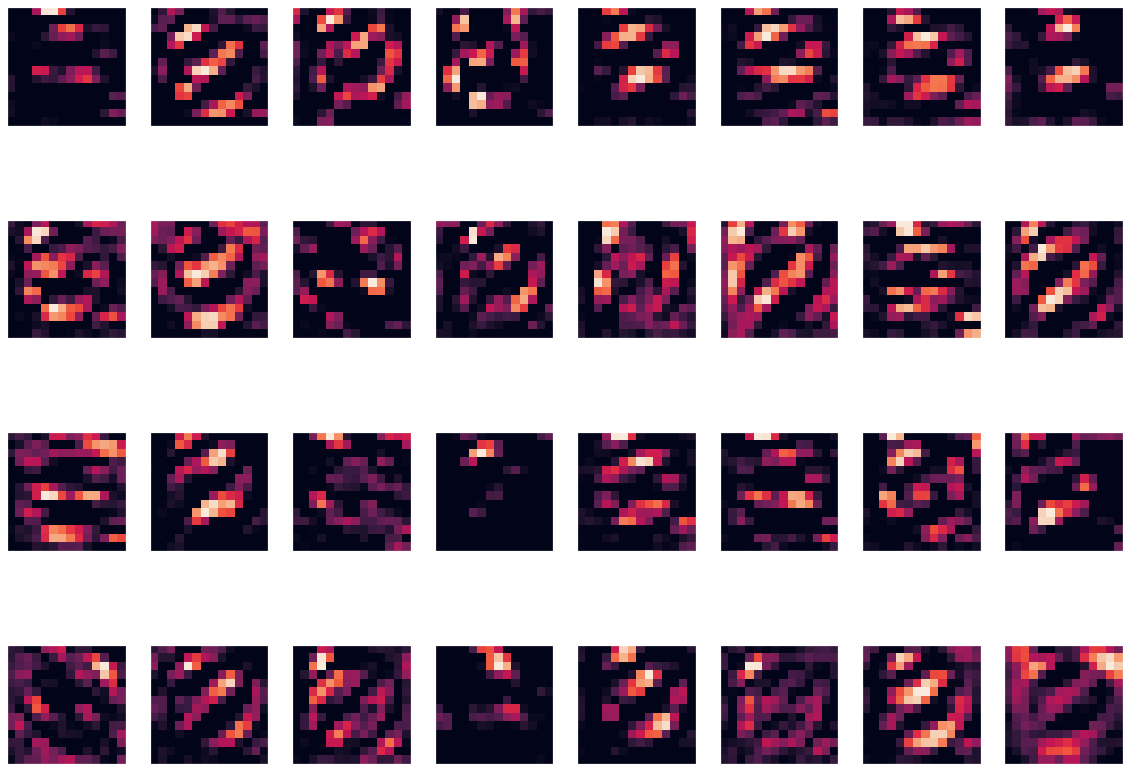

layer : Conv3_3 , feature map shape : (1, 14, 14, 64)
nrow : 8 , ncol : 8


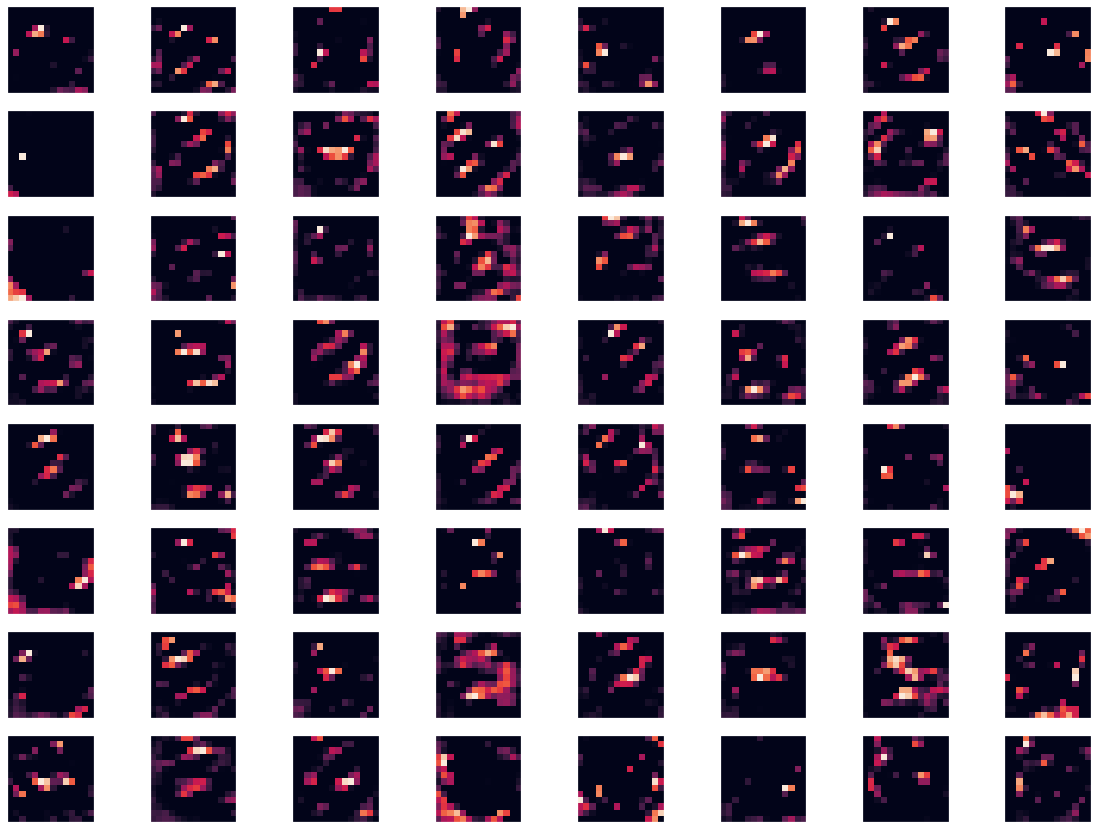

layer : Bnorm3 , feature map shape : (1, 14, 14, 64)
nrow : 8 , ncol : 8


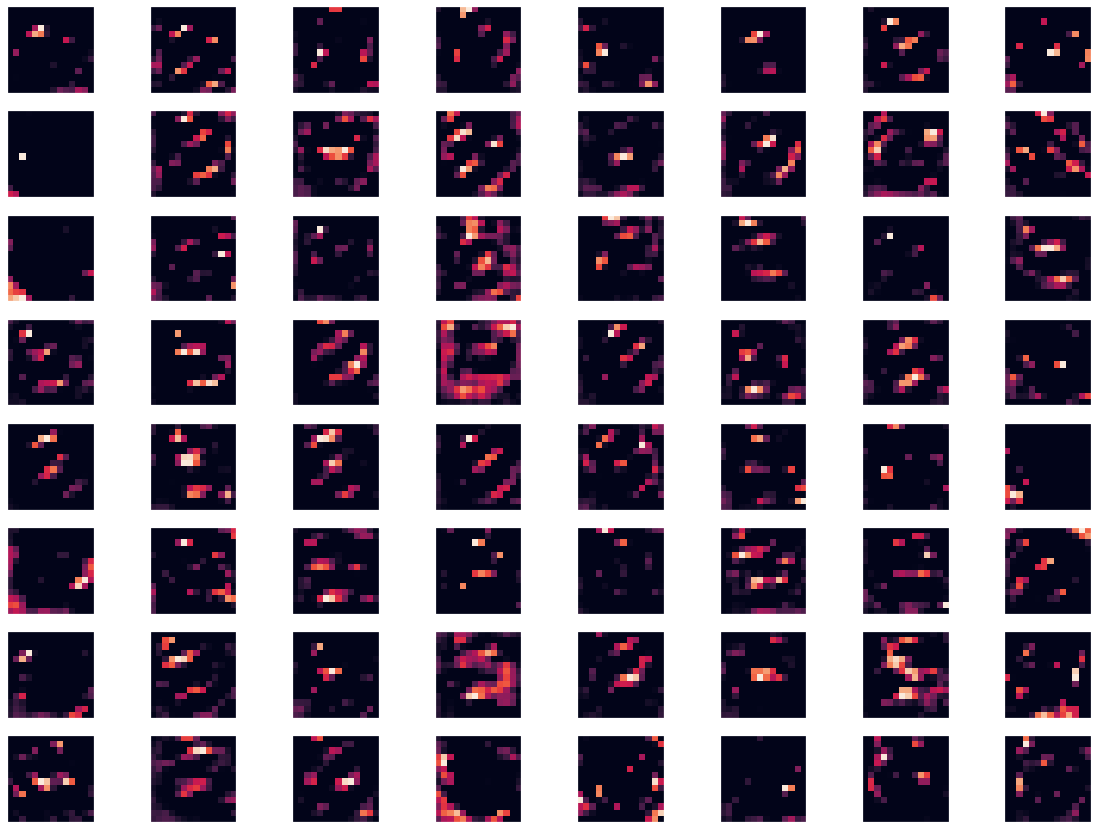

layer : Conv4_3 , feature map shape : (1, 14, 14, 64)
nrow : 8 , ncol : 8


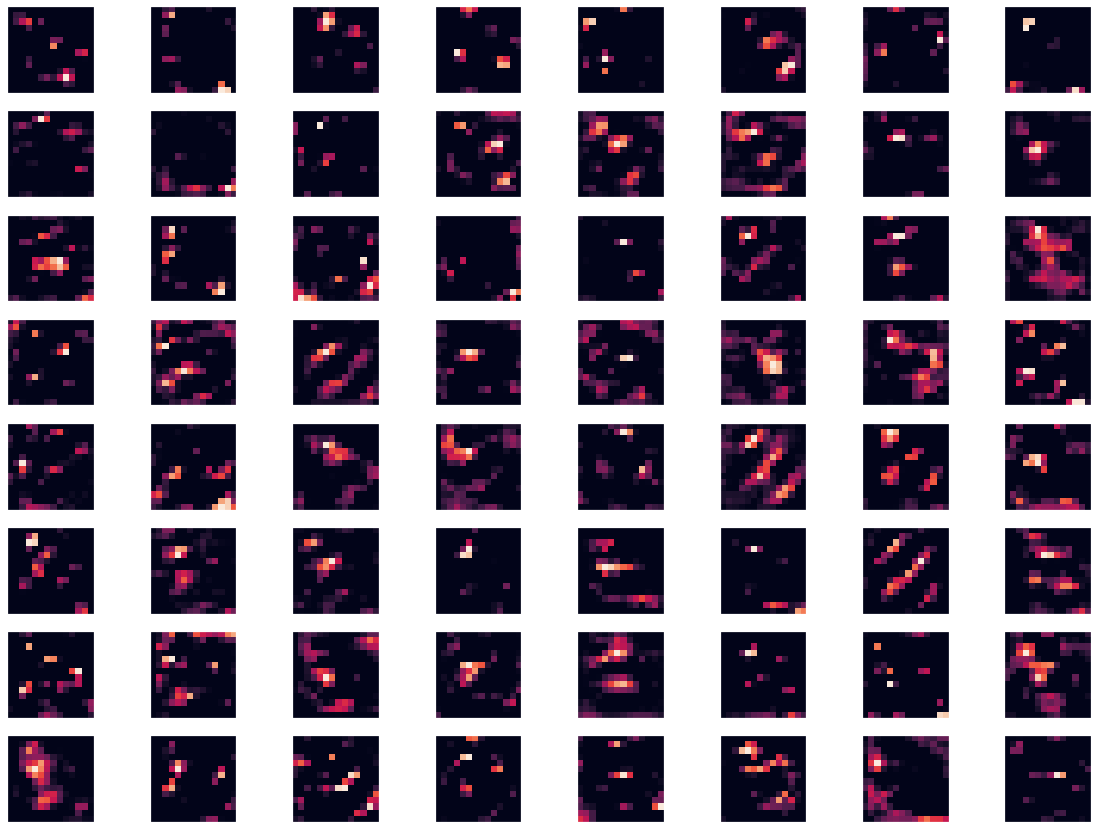

layer : Bnorm4 , feature map shape : (1, 14, 14, 64)
nrow : 8 , ncol : 8


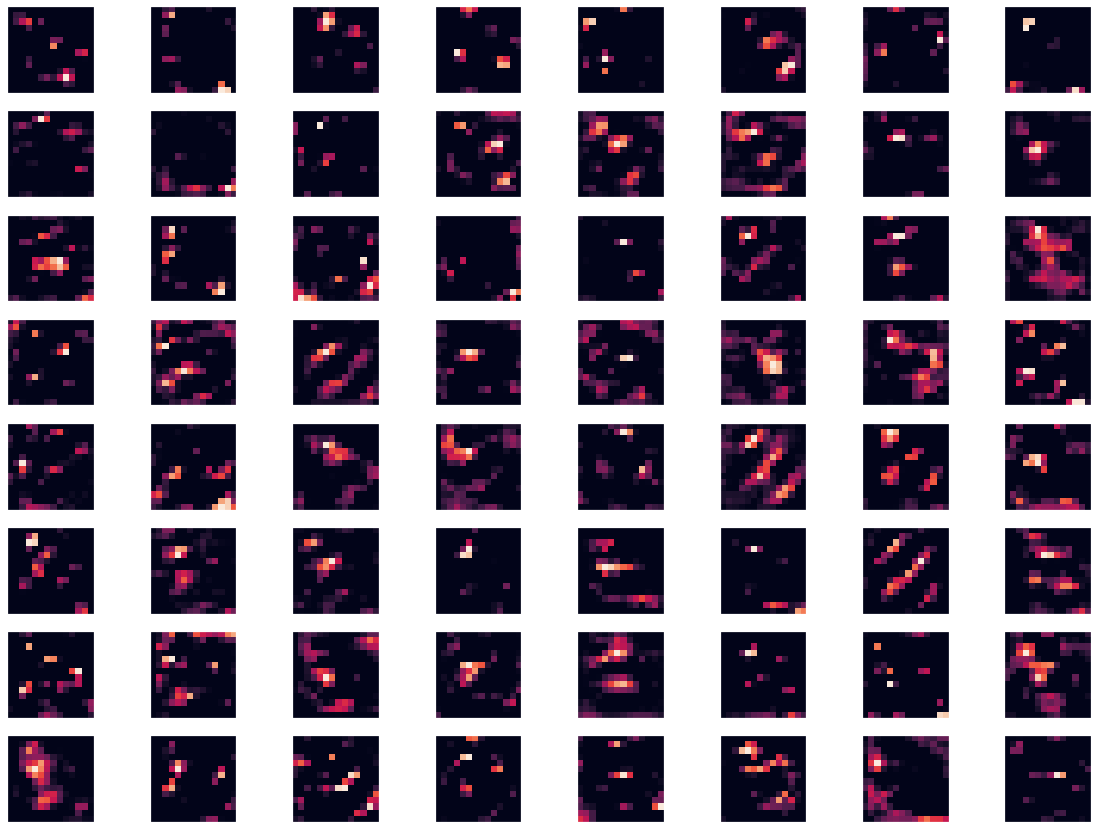

layer : AvgPool1 , feature map shape : (1, 7, 7, 64)
nrow : 8 , ncol : 8


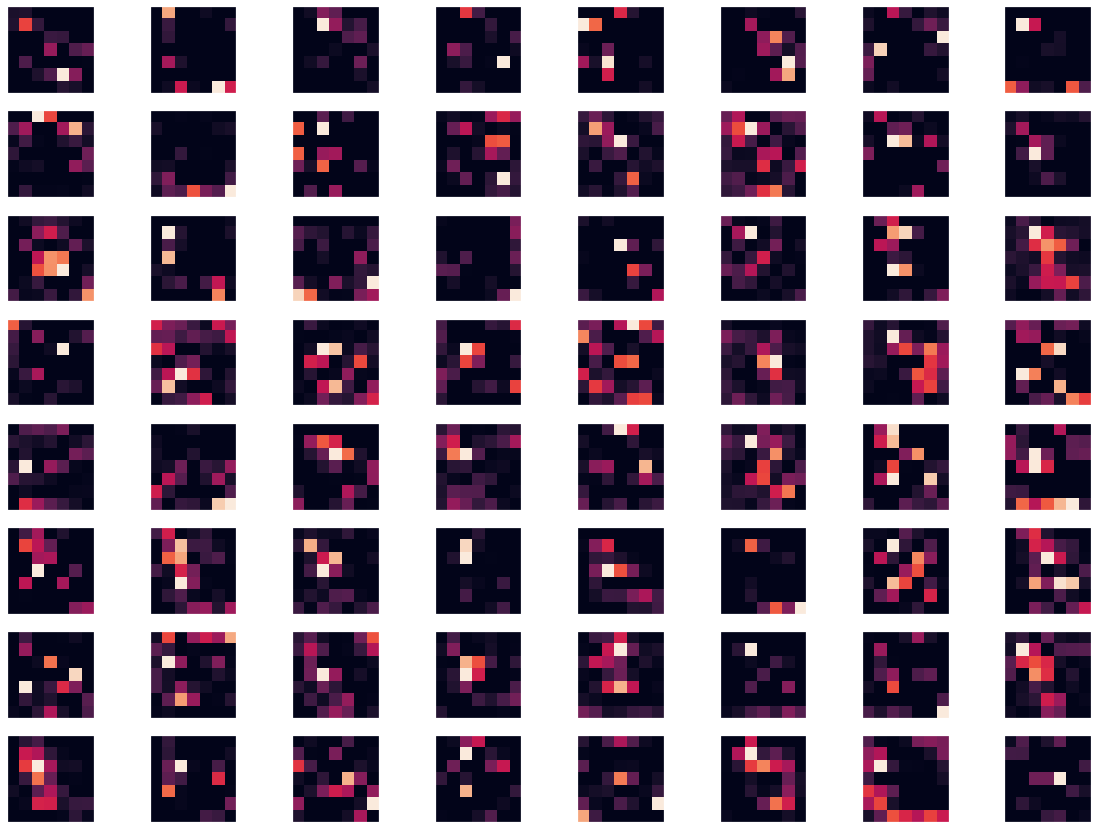

layer : Conv5_1 , feature map shape : (1, 7, 7, 128)
nrow : 16 , ncol : 8


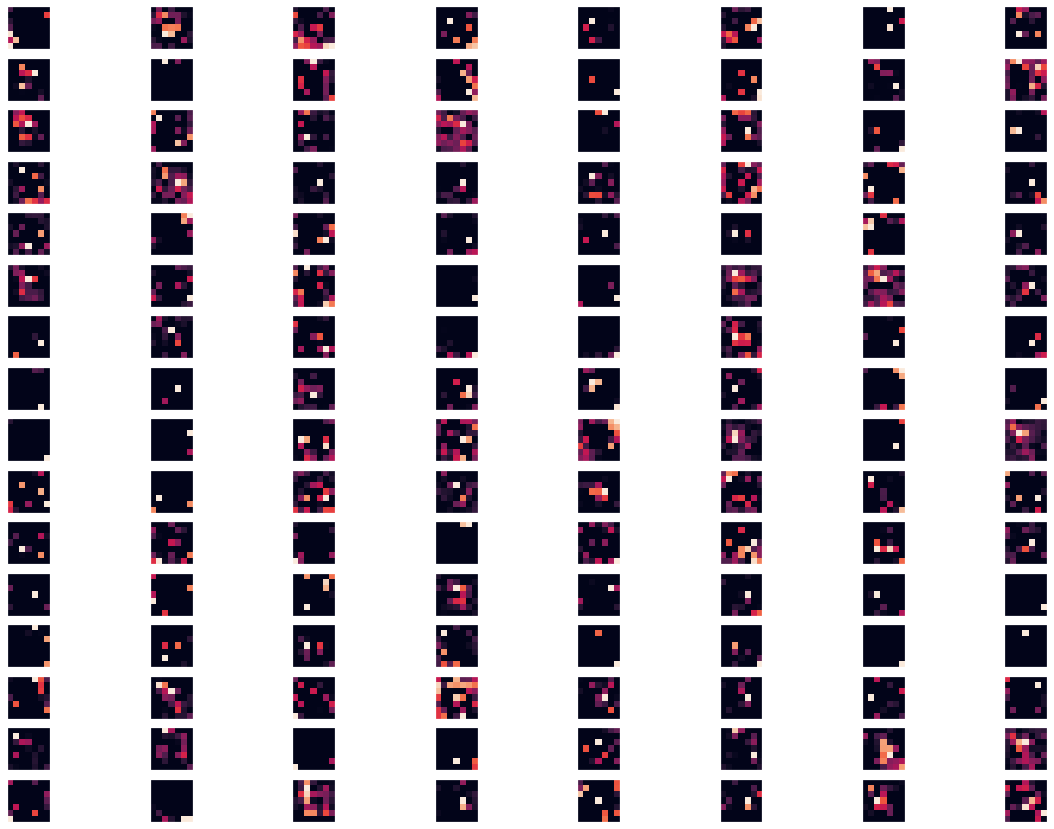

layer : Bnorm5 , feature map shape : (1, 7, 7, 128)
nrow : 16 , ncol : 8


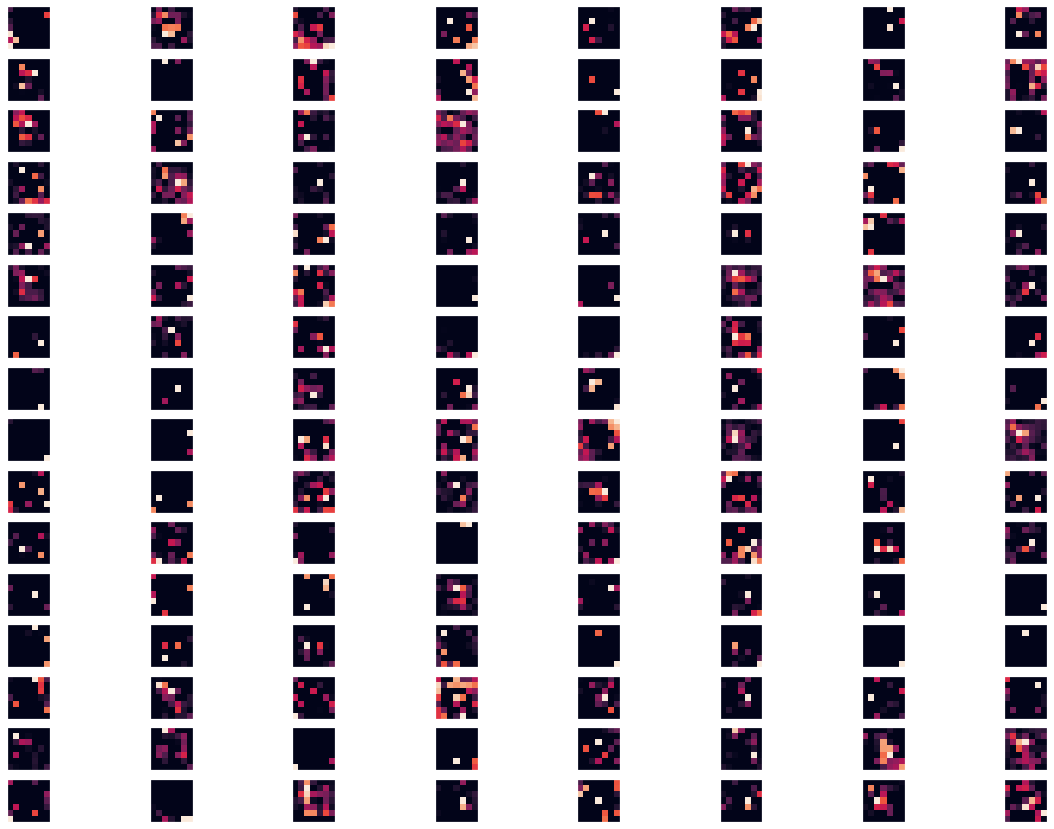

In [ ]:
for n_layer in range(1,13):
  model_layer = Model(inputs=model.inputs, outputs=model.layers[n_layer].output)
  feature_maps = model_layer.predict(X_train[100].reshape(1,32,32,3))
  print('layer : {} , feature map shape : {}'.format(model.layers[n_layer].name,feature_maps.shape))

  n_row = int(feature_maps.shape[-1]/8)
  n_col = 8
  print('nrow : {} , ncol : {}'.format(n_row,n_col))
  plt.figure(figsize=(20,15))
  # plot all maps in an shape/8 * 8 squares
  ix = 1
  for _ in range(n_row):
	  for _ in range(n_col):
		  # specify subplot and turn of axis
		  ax = plt.subplot(n_row, n_col, ix)
		  ax.set_xticks([])
		  ax.set_yticks([])
		  # plot filter channel in grayscale
		  plt.imshow(feature_maps[0, :, :, ix-1])
		  ix += 1
  # show the figure
  plt.show()

وقتی خروجی های لایه های مختلف شبکه را بر روی عکس نمایش می دهیم میبینیم که در ابتدا در عکس ها ویژگی های ساده تری بررسی می شود مثلا در اینجا در لایه های ابتدایی دایره ی دور تابلو و وجود خطوط در تصویر بررسی می شود ولی هرچه لایه ها بیشتر شوند و عمیق تر میشویم ویژگی های لایه های ابتدایی با هم ترکیب می شوند و ویژگی های پیچیده تری بررسی می شوند مثلا در لایه های آخری مانند این است که عکس پیکسل به پیکسل بررسی می شود.
در لایه های کانولوشن ویژگی های تصویر بررسی می شود و در لایه های پولینگ ویژگی های مهم تر به لایه ی بعدی انتقال داده می شود تا بار محاسباتی کمتر شود.
لایه های بچ نرمالیزیشن روشی هستند برای اینکه اجازه دهند تا هر لایه از شبکه کمی بیشتر مستقل از لایه های دیگر یاد بگیرد و باعث ایجاد شبکه های عصبی پایدارتر و سریعتر می شوند.

# Visualizing filters of convolutional layer

با استفاده از دستور زیر برای هر لایه ی کانولوشنال 6 تا از فیلترهای آن را چاپ می کند.طبق این فیلترها فبچر مپ ها تولید می شوندو این فیلتر ها نشان می دهند چه ناحیه هایی مورد بررسی قرار میگیرند

Conv1_5


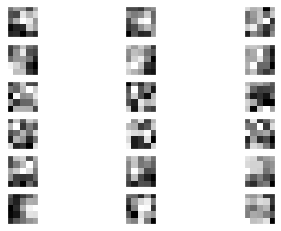

Conv2_5


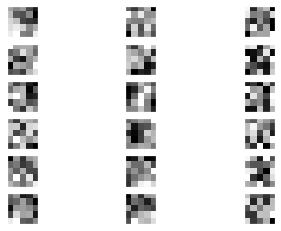

Conv3_3


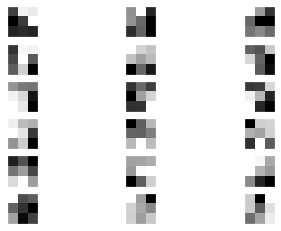

Conv4_3


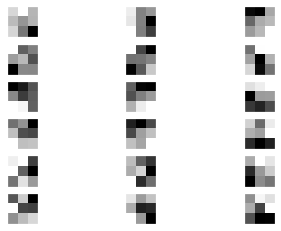

Conv5_1


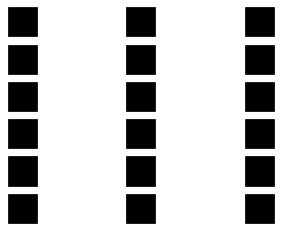

In [ ]:
from matplotlib import pyplot
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/proj2_1/model2_hist.h5')

for layer in model.layers[1:13]:
  if 'Conv' not in layer.name:
    continue
  # get filter weights
  print(layer.name)
  filters, biases = layer.get_weights()

  # normalize filter values to 0-1 so we can visualize them
  f_min, f_max = filters.min(), filters.max()
  filters = (filters - f_min) / (f_max - f_min)

  # plot first few filters
  n_filters, ix = 6, 1
  for i in range(n_filters):
	  # get the filter
	  f = filters[:, :, :, i]
	  # plot each channel separately
	  for j in range(3):
		  # specify subplot and turn of axis
		  ax = pyplot.subplot(n_filters, 3, ix)
		  ax.set_xticks([])
		  ax.set_yticks([])
		  # plot filter channel in grayscale
		  pyplot.imshow(f[:, :, j], cmap='gray')
		  ix += 1
  # show the figure
  pyplot.show()



# Grayscale images

با دستور زیر همه ی عکس های آموزشی، ولید و تست را به سیاه سفید تبدیل می کنیم تا پیچیدگی داده ها کمتر شود

In [ ]:
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# convert train data to grayscale to reduce complexity and make the mean zero
X_train_gray = []
for image in X_train:
    X_train_gray.append(rgb2gray(image))
X_train_gray = np.array(X_train_gray)  

#do the same for the validation data
X_valid_gray = []
for image in X_valid:
    X_valid_gray.append(rgb2gray(image))
X_valid_gray = np.array(X_valid_gray)

#do the same for the test data
X_test_gray = []
for image in X_test:
    X_test_gray.append(rgb2gray(image))
X_test_gray = np.array(X_test_gray)    

برای نمونه یک عکس دلخواه را یکبار در حالت رنگی و بار دیگر در حالت سیاه سفید نمایش می دهیم.

<function matplotlib.pyplot.show>

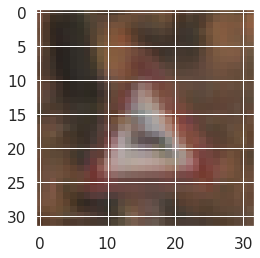

In [ ]:
plt.imshow(X_train[300])
plt.show

<function matplotlib.pyplot.show>

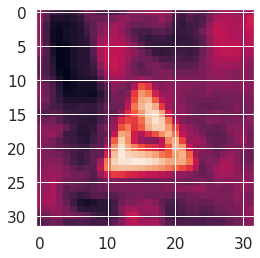

In [ ]:
plt.imshow(X_train_gray[300])
plt.show


حال میخواهیم این عکس های سیاه و سفید را به مدل دوم که بهترین مدل ما بوده بدهیم تا ببنیم تغییری در دقت بوجود می آید یا نه
ثبل از دادن به شبکه با عکس های سیاه سفید نیز مانند عکس های قبلی برخورد میکنیم و ایمیج دیتا جنریتور روی آن بکار میبریم تا با افزایش داده ها دقت و تعمیم مدل افازیش پیدا کند

In [ ]:
# reshape dataset to have a single channel
X_train_gray = X_train_gray.reshape((X_train_gray.shape[0], 32, 32, 1))

X_valid_gray = X_valid_gray.reshape((X_valid_gray.shape[0], 32, 32, 1))

X_test_gray = X_test_gray.reshape((X_test_gray.shape[0], 32, 32, 1))

مقایسه ی یک عکس دلخواه که یکبار با استفاده از تابعی روشنی آن تنظیم شده و همان عکس بدون استفاده از تابع
در عکس اول که از این تابع استفاده شده عکس روشن تر و قابل تشخیص تر شده است

/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


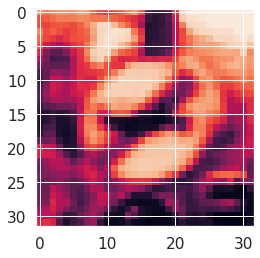

<function matplotlib.pyplot.show>

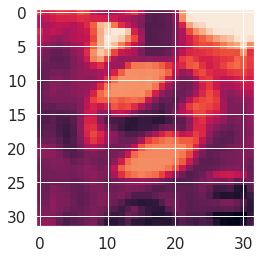

In [ ]:
from skimage import exposure

imag = exposure.equalize_hist(X_train_gray[100])
plt.imshow(imag.reshape(32,32))
plt.show()
imag1 = X_train_gray[100].reshape(32,32)
plt.imshow(imag1)
plt.show

In [ ]:
# apply equalization histogram on dataset
X_train_gray_p = []
for image in X_train_gray:
    X_train_gray_p.append(exposure.equalize_hist(image))
X_train_gray_p = np.array(X_train_gray_p)  
print(X_train_gray_p.shape)

X_valid_gray_p = []
for image in X_valid_gray:
    X_valid_gray_p.append(exposure.equalize_hist(image))
X_valid_gray_p = np.array(X_valid_gray_p)  
print(X_valid_gray_p.shape)

X_test_gray_p = []
for image in X_test_gray:
    X_test_gray_p.append(exposure.equalize_hist(image))
X_test_gray_p = np.array(X_test_gray_p)  
print(X_test_gray_p.shape)

/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
batch_size = 128
Training_data_gray = datagen.flow(X_train_gray_p, y_train, batch_size = batch_size)

Validation_data_gray = datagen.flow(X_valid_gray_p, y_valid, batch_size = batch_size)

Testing_data_gray =  datagen.flow(X_test_gray_p, y_test, batch_size = batch_size)


# model 2 on grayscale data

In [ ]:
classWeight = {i:classWeight[i] for i in range(classWeight.size)}
print(classWeight)

{0: 11.166667, 1: 1.0151515, 2: 1.0, 3: 1.5952381, 4: 1.1355932, 5: 1.2181818, 6: 5.5833335, 7: 1.5581396, 8: 1.5952381, 9: 1.5227273, 10: 1.1166667, 11: 1.7179487, 12: 1.0634921, 13: 1.046875, 14: 2.9130435, 15: 3.7222223, 16: 5.5833335, 17: 2.030303, 18: 1.8611112, 19: 11.166667, 20: 6.7, 21: 7.4444447, 22: 6.090909, 23: 4.4666667, 24: 8.375, 25: 1.4888889, 26: 3.7222223, 27: 9.571428, 28: 4.1875, 29: 8.375, 30: 5.1538463, 31: 2.9130435, 32: 9.571428, 33: 3.3555927, 34: 5.5833335, 35: 1.8611112, 36: 6.090909, 37: 11.166667, 38: 1.0806452, 39: 7.4444447, 40: 6.7, 41: 9.571428, 42: 9.571428}


In [ ]:
input_model = Input((X_train_gray.shape[1],X_train.shape[2],X_train_gray.shape[3]),name = 'input_layer')

model2 = Conv2D(32,(5,5), activation='relu',name = 'Conv1_5')(input_model)
model2 = BatchNormalization(name = 'Bnorm1')(model2)
model2 = Conv2D(32,(5,5), activation='relu', padding='same',name= 'Conv2_5')(model2)
model2 = BatchNormalization(name = 'Bnorm2')(model2)
model2 = MaxPooling2D((2, 2),name = 'MaxPool1')(model2)
model2 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv3_3')(model2)
model2 = BatchNormalization(name = 'Bnorm3')(model2)
model2 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv4_3')(model2)
model2 = BatchNormalization(name = 'Bnorm4')(model2)
model2 = AveragePooling2D((2, 2),name = 'AvgPool1')(model2)
model2 = Conv2D(128,(1,1), activation='relu' ,padding='valid',name = 'Conv5_1')(model2)
model2 = BatchNormalization(name = 'Bnorm5')(model2)
########################################################
model2 = Flatten(name = 'Flatten')(model2)
########################################################
model2 = Dense(units = 32, activation = 'relu')(model2)
model2 = Dropout(rate = 0.2)(model2)
model2 = BatchNormalization()(model2)
model2 = Dense(units = 20, activation = 'relu')(model2)
model2 = BatchNormalization()(model2)
model2 = Dense(units = 15, activation = 'relu')(model2)
model2 = BatchNormalization()(model2)
output = Dense(units = 43, activation = 'softmax' , name='preds')(model2)

model = Model(inputs= [input_model], outputs=[output])
model.summary()

Model: "functional_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 1)]       0         
_________________________________________________________________
Conv1_5 (Conv2D)             (None, 28, 28, 32)        832       
_________________________________________________________________
Bnorm1 (BatchNormalization)  (None, 28, 28, 32)        128       
_________________________________________________________________
Conv2_5 (Conv2D)             (None, 28, 28, 32)        25632     
_________________________________________________________________
Bnorm2 (BatchNormalization)  (None, 28, 28, 32)        128       
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
Conv3_3 (Conv2D)             (None, 14, 14, 64)     

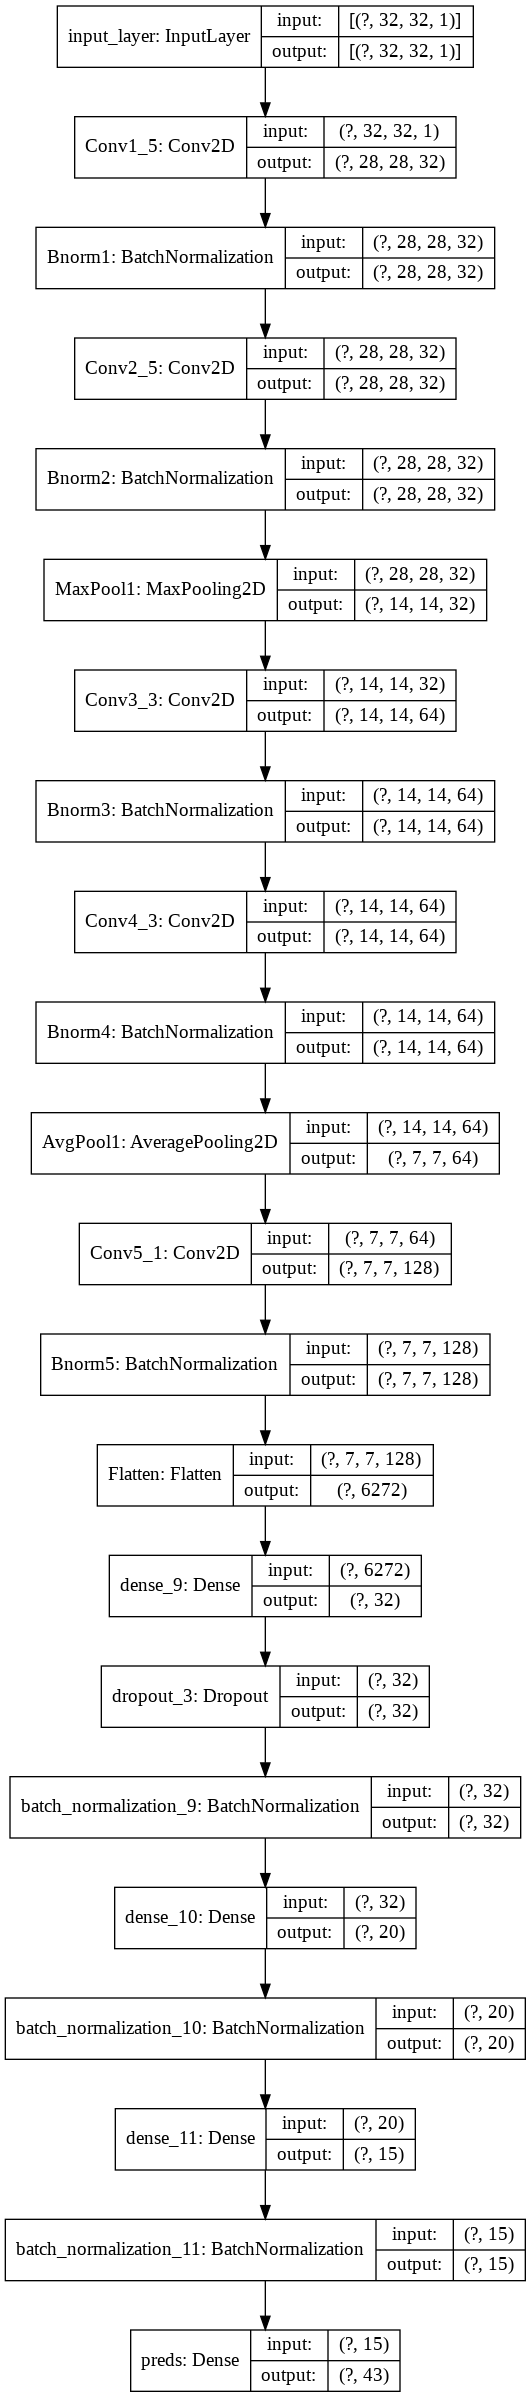

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(Training_data_gray, epochs= 5, validation_data=Validation_data_gray , verbose=1, callbacks=[checkpointer], class_weight= classWeight)

Epoch 1/5
271/272 [============================>.] - ETA: 0s - loss: 0.1897 - accuracy: 0.9735
Epoch 00001: val_accuracy did not improve from 0.96757
272/272 [==============================] - 11s 41ms/step - loss: 0.1897 - accuracy: 0.9735 - val_loss: 0.1976 - val_accuracy: 0.9506
Epoch 2/5
271/272 [============================>.] - ETA: 0s - loss: 0.1693 - accuracy: 0.9750
Epoch 00002: val_accuracy did not improve from 0.96757
272/272 [==============================] - 11s 41ms/step - loss: 0.1694 - accuracy: 0.9750 - val_loss: 0.1758 - val_accuracy: 0.9537
Epoch 3/5
271/272 [============================>.] - ETA: 0s - loss: 0.1578 - accuracy: 0.9776
Epoch 00003: val_accuracy improved from 0.96757 to 0.96984, saving model to best_weights.hdf5
272/272 [==============================] - 11s 41ms/step - loss: 0.1575 - accuracy: 0.9776 - val_loss: 0.1089 - val_accuracy: 0.9698
Epoch 4/5
271/272 [============================>.] - ETA: 0s - loss: 0.1570 - accuracy: 0.9792
Epoch 00004: val_

In [ ]:
model.save_weights("model2_gray_weights_hist.h5")
model.save("model2_gray_hist.h5")

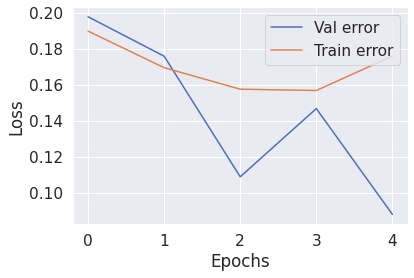

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error2_gray.png')
plt.show()

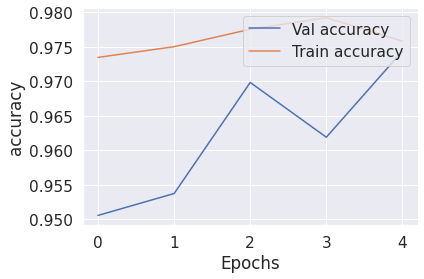

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy2_gray.png')
plt.show()

In [ ]:
score, acc = model.evaluate(X_test_gray, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

99/99 [==============================] - 1s 6ms/step - loss: 2.5958 - accuracy: 0.7808
Test score: 2.5958197116851807
Test accuracy: 0.7808392643928528


همانطور که میبینیم با سیاه و سفید کردن عکس ها خیلی نتیجه ی تقریبا مشابه البته کمی بدتر روی معماری مدل دوم که بهترین مدل ما بو میگیریم. زیرا سیاه سفید کردن عکس ها باعث میشود پیچیدگی داده های ما کمتر شود و تعداد کانال های رنگی عکس ما از 3 به 1 کاهش پیدا کند.
(البته این دقت بستخ به هر بار اجرای مدل ما است مثلا من دفعه ی قبل که این مدل را روی داده سیاه سفیذد اجرا کردم نتیجه بهتری روی داده سیاه سفید گرفتم)
همچنین اینکار باعث میشود لرن کردن مد ما بسیار کمتر طول بکشد
!!!!
لرن کردن مدل ما در صورتی که عکس رنگی بود، به ازای هر ایپاک حدودا 43 ثانیه طول میکشد در حالی که در حالتی که عکس سیاه و سفید باش هر ایپاک حدود 11 ثانیه طول می کشد یعنی لرن کردن مدل با عکس رنگی 4 برابر زمان بیشتری نسبت به لرن کردن مدل با عکس سیاه و سفید طول میکشد. همچنین این مدل دقت بهتری روی داده های ولید بدست آورده. دقت روی داده های تست نیز برای دادهای رنگی 81 درصد بوده که اینجا 78 درصد است و تفاوت خیلی زیادی با هم ندارند..
پس می توان گفت در این مسئله رنگی بودن عکس ها باعث بهبود تشخیص در کلاس بندی نمیشود و نتیجه به رنگی بودن عکس بستگی ندارد و اگر با عکس های سیاه و سفید کار کنیم پیچیدگی کمتر میشود و در حافظه و زمان صرفه جویی میشود.  